# <center>House Price Prediction</center>

A US-based housing company named __Surprise Housing__ has decided to enter the __Australian market__. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

 
The company is looking at prospective properties to buy to enter the market. `We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.`

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.


### Business Goal :
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflo
import warnings
warnings.filterwarnings("ignore")

# Setting default style for plots
plt.style.use("bmh")

# Setting max_cols for pd display
pd.set_option('display.max_columns',50)

Reading the dataset :  __train.csv__

In [2]:
# Reading dataset and saving as dataframe object

housingDataset = pd.read_csv("train.csv")

In [3]:
# Exploring the dataframe

housingDataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Printing shape of dataset

housingDataset.shape

(1460, 81)

Here, we have __81 columns__ in our dataset. Now, let's start with __Data Cleaning.__

# 1. DATA CLEANING

## Fixing Rows:
1. There are no header or footer rows in our dataset.
2. There is no summary rows in our dataset.

So, we don't need to fix any rows.

## Fixing Columns:

In our dataset the first column is __Id__, which tells the row number. We don't need that information.
So, we'll drop that column.

In [5]:
# Dropping the "Id" column from our dataframe

housingDataset.drop('Id', axis=1, inplace=True)

In [6]:
# Checking if "Id" columns is dropped

housingDataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now, let's check if columns have a proper name.

In [7]:
# Printing the name of columns in the dataset

housingDataset.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Here, we can see the all the columns have a proper name.

We have now fixed our rows and columns Now, let's treat the missing values (if any).

## Treating Missing Values
Now, let's check if there are any missing values in our dataset.

In [8]:
def checkMissingVals(df):
    '''Function to check for missing values in a dataframe'''
    dfNulls = df.isnull().sum()/df.shape[0]*100
    print(round(dfNulls[dfNulls!=0],2))

In [9]:
# Checking missing values in the dataset

checkMissingVals(housingDataset)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


Here, we can see there are many columns with missing values. So, we need to treat them accordingly.

Let's write a function to generate a boxplot and print the description statistics for numerical columns

In [10]:
def numericalStats(df):
    '''
    Function to generate a boxplot and 
    print the description statistics for numerical columns
    '''
    print(df.describe())
    sns.boxplot(y=df)

Let's write another function for analyzing the categorical columns.

In [11]:
def categoricalDistribution(df):
    '''
    Function to print the category counts proportion
    and corresponding barchart
    '''
    print(df.value_counts(1))
    df.value_counts(1).plot.bar()

Let's start with __LotFrontage__

### 1. LotFrontage

Since, LotFrontage is a numerical column we will look at its distribution.

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


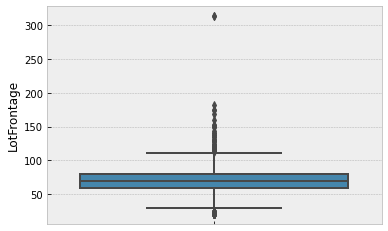

In [12]:
# Printing stats for LotFronatage

numericalStats(housingDataset['LotFrontage'])

There are many missing rows in this column (approx. 18%). Hence, we can't drop the missing rows as we'll lose a significant amount of data with that. So, we will impute the missing values with the representative value.
Also, we can see from the above cell output that LotFrontage has huge number of outliers.

So, we can't impute missing values using mean. We'll use median for imputing missing values.

In [13]:
# Imputing missing values in LotFrontage using the median value

housingDataset['LotFrontage'] = housingDataset['LotFrontage'].fillna(housingDataset['LotFrontage'].median())

Now, we have treated the missing values in LotFrontage. Now, let's proceed with __Alley__.

### 2. Alley

__Alley__ is a categorical column. As per the Data Dictionary, __NA__ means there's no alley access to the house.<br>
So, we will impute the missing values with __"NoAlley"__

In [14]:
# Imputing missing values in Alley with "NoAlley"

housingDataset['Alley'] = housingDataset['Alley'].fillna("NoAlley")

In [15]:
# Checking the update in Alley column

housingDataset['Alley'].value_counts()

NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

Now, we have treated the missing values in Alley. Now, let's proceed with __MasVnrType and MasVnrArea__.

### 3. MasVnrType and MasVnrArea

We can see that, __MasVnrType and MasVnrArea__ have same amount of missing columns i.e. 0.55%. The proportion of rows with missing values is very less, hence, we can drop those rows. Also, there's no explanantion for __NA__ values given in the data dictionary.

So, we will drop the rows which has missing values for these columns.

In [16]:
# Dropping missing rows for MasVnrType and MasVnrArea

housingDataset = housingDataset[~((housingDataset.MasVnrType.isnull()) | (housingDataset.MasVnrArea.isnull()))]

Now, let's check the missing values again, since we have dropped some rows.

In [17]:
# Checking the proportion of missing values

checkMissingVals(housingDataset)

BsmtQual         2.55
BsmtCond         2.55
BsmtExposure     2.62
BsmtFinType1     2.55
BsmtFinType2     2.62
Electrical       0.07
FireplaceQu     47.25
GarageType       5.58
GarageYrBlt      5.58
GarageFinish     5.58
GarageQual       5.58
GarageCond       5.58
PoolQC          99.52
Fence           80.65
MiscFeature     96.28
dtype: float64


Now, let's proceed with other columns.

### 4. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2

As per the data dictionary, for the columns __BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2__, "NA" means there's No Basement in the house.

So, we will impute the missing values in these column as __BasementUnavailable__

In [18]:
# Imputing missing values for the above columns with "BasementUnavailable"

housingDataset['BsmtQual'] = housingDataset['BsmtQual'].fillna("BasementUnavailable")
housingDataset['BsmtCond'] = housingDataset['BsmtCond'].fillna("BasementUnavailable")
housingDataset['BsmtExposure'] = housingDataset['BsmtExposure'].fillna("BasementUnavailable")
housingDataset['BsmtFinType1'] = housingDataset['BsmtFinType1'].fillna("BasementUnavailable")
housingDataset['BsmtFinType2'] = housingDataset['BsmtFinType2'].fillna("BasementUnavailable")

We have now imputed the basement columns with the corresponding value as per the data dictionary. Let's now proceed with __Electrical__ column.

### 5. Electrical

__Electrical__ column has very less proportion of missing values i.e. only 0.07% and since there's no information for the __NA__ values we will drop the rows with missing values for this column.

In [19]:
# Dropping missing rows for Electrical column

housingDataset = housingDataset[~housingDataset.Electrical.isnull()]

Now, let's check the missing values again, since we have dropped some rows.

In [20]:
# Checking the proportion of missing values

checkMissingVals(housingDataset)

FireplaceQu     47.21
GarageType       5.58
GarageYrBlt      5.58
GarageFinish     5.58
GarageQual       5.58
GarageCond       5.58
PoolQC          99.52
Fence           80.63
MiscFeature     96.28
dtype: float64


Now, let's proceed with other columns.

### 6. FireplaceQu

As per the data dictionary, for the columns __FireplaceQu__, "NA" means there's No Fireplace in the house.

So, we will impute the missing values in these column as __FireplaceUnavailable__

In [21]:
# Imputing missing values for the above columns with "FireplaceUnavailable"

housingDataset['FireplaceQu'] = housingDataset['FireplaceQu'].fillna("FireplaceUnavailable")

We have now imputed the FireplaceQu column with the corresponding value as per the data dictionary. Let's now proceed with the remaining columns.

### 7. GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond

As per the data dictionary, for the columns __GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond__, "NA" means there's No Garage in the house.

So, we will impute the missing values in these column as __GarageUnavailable__

In [22]:
# Imputing missing values for the above columns with "GarageUnavailable"

housingDataset['GarageType'] = housingDataset['GarageType'].fillna("GarageUnavailable")
housingDataset['GarageYrBlt'] = housingDataset['GarageYrBlt'].fillna("GarageUnavailable")
housingDataset['GarageFinish'] = housingDataset['GarageFinish'].fillna("GarageUnavailable")
housingDataset['GarageQual'] = housingDataset['GarageQual'].fillna("GarageUnavailable")
housingDataset['GarageCond'] = housingDataset['GarageCond'].fillna("GarageUnavailable")

We have now imputed the basement columns with the corresponding value as per the data dictionary. Let's now proceed with __PoolQC__ column.

### 8. PoolQC

As per the data dictionary, for the columns __PoolQC__, "NA" means there's No Pool in the house.

So, we will impute the missing values in these column as __PoolUnavailable__

In [23]:
# Imputing missing values for the above columns with "PoolUnavailable"

housingDataset['PoolQC'] = housingDataset['PoolQC'].fillna("PoolUnavailable")

We have now imputed the PoolQC column with the corresponding value as per the data dictionary. Let's now proceed with the __Fence__ column.

### 9. Fence

As per the data dictionary, for the columns __Fence__, "NA" means there's No Fence in the house.

So, we will impute the missing values in these column as __FenceUnavailable__

In [24]:
# Imputing missing values for the above columns with "FenceUnavailable"

housingDataset['Fence'] = housingDataset['Fence'].fillna("FenceUnavailable")

We have now imputed the Fence column with the corresponding value as per the data dictionary. Let's now proceed with the last column i.e. __MiscFeature__.

### 10. MiscFeature

As per the data dictionary, for the columns __MiscFeature__, "NA" means None or there's no miscellaneous Feature  in the house.

So, we will impute the missing values in these column as __None__

In [25]:
# Imputing missing values for the above columns with "None"

housingDataset['MiscFeature'] = housingDataset['MiscFeature'].fillna("None")

We have now imputed the MiscFeature column with the corresponding value as per the data dictionary.

Now, let's check the missing values to confirm that we have treated all of them.

In [26]:
# Checking the proportion of missing values

checkMissingVals(housingDataset)

Series([], dtype: float64)


So, we can see we have __treated all the missing values in the dataset.__ Now we can proceed with Standardizing values.

## Standardizing Values
Here, we will standardize our values i.e. we will perform the following:
- Standardize the precision for floating point columns.
- Treat the skewness and outliers in data (numerical columns)

So, let's first retrieve the columns with floating point data type

In [27]:
# Retrieve the columns with float64 datatype

floatCols = housingDataset.select_dtypes("float64").columns
floatCols

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [28]:
# Standardizing the precision to 2 digits after decimal for floating point columns

housingDataset[floatCols] = housingDataset[floatCols].apply(lambda x : round(x,2), axis=1)

In [29]:
# Checking the sample to validate changes

housingDataset[floatCols].sample(5)

,LotFrontage,MasVnrArea
154,84.0,0.0
896,50.0,0.0
699,59.0,0.0
407,63.0,0.0
871,70.0,116.0


Now, we have standardized the precision. Now let's handle the skewness in data.

For handling the skewness in Data. We can use __Log Transformation__.

For that, we need to first check the columns with numerical datatype and decide which columns to pick.

In [30]:
# Printing columns with numerical datatype

housingDataset.select_dtypes(["int64",'float64']).dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

As we can see from the above cell output that there are lot of numerical columns. But, few of them are like categorical columns. So, we will ignore the following columns:
1. MSSubClass
2. OverallQual
3. OverallCond
4. YearBuilt
5. YearRemodAdd
6. MoSold
7. YrSold

Let's first analyze the __LotFrontage__ column and see how it is distributed originally.

In [31]:
# Defining a function to analyze a numerical column
def numericalAnalyze(col):
    print(col.describe())
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.distplot(col)
    plt.subplot(1,2,2)
    sns.boxplot(y=col)

count    1451.000000
mean       69.845624
std        22.044429
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


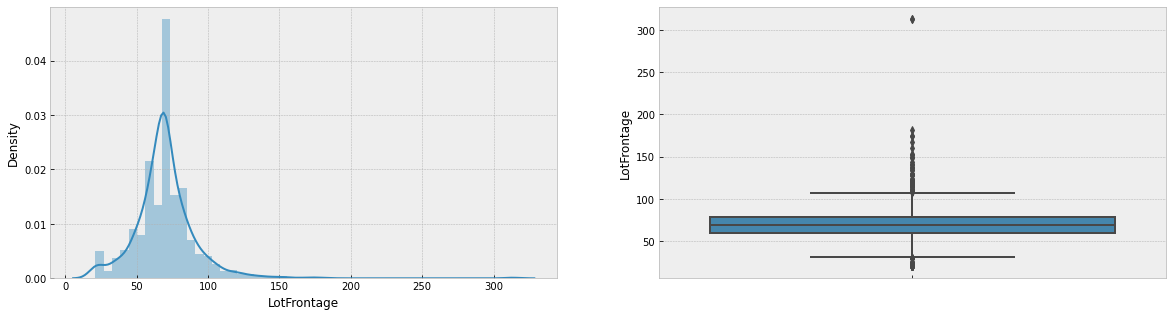

In [32]:
# Analyze LotFrontage before transformation

numericalAnalyze(housingDataset['LotFrontage'])

We can see in the above cell output that there's a huge difference between 75th percentile and maximum value similary for minimum and 25th percentile the difference is slighlty huge.This indicates the presence of outliers. Also, the distribution looks right skewed.

We will apply __Log Transformation__ to the numerical columns in our dataset.<br>
__NOTE__: We know that, Log transformation returns __infinite/not defined__ for 0 values.

And, we have 0 values in our dataset for numerical columns. So, we can't use __np.log()__ here as it returns __-inf__ for 0.<br> Hence, we will use __np.log1p()__ as it returns 0.0 for 0 values.

count    1451.000000
mean        4.214147
std         0.314533
min         3.091042
25%         4.110874
50%         4.248495
75%         4.382027
max         5.749393
Name: LotFrontage, dtype: float64


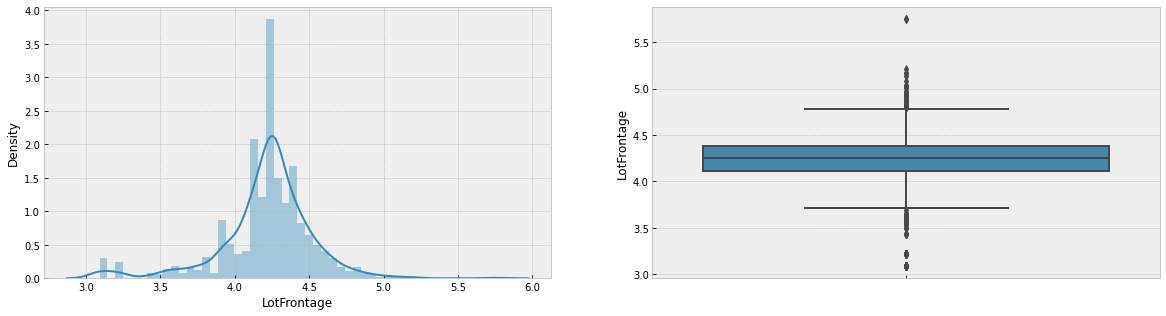

In [33]:
# Transforming LotFrontage using np.log1p() and analyzing it

numericalAnalyze(np.log1p(housingDataset['LotFrontage']))

We can see __Log Transformation__ effectively handles the skewness in data. Now, let's apply this transformation to all the numerical columns.

In [34]:
# Creating a list of numerical columns

numericalCols = list(housingDataset.select_dtypes(["int64",'float64']).columns)
numericCat = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold']
numericalCols = [col for col in numericalCols if col not in numericCat]

In [35]:
# Transforming numerical columns with np.log1p()

housingDataset[numericalCols] = np.log1p(housingDataset[numericalCols])

Now, we have handled the skewness and also handled extreme values(outliers).

Now, let's look at description statistics for these columns to see the changes.

In [36]:
# Printing description for numerical columns

housingDataset[numericalCols].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,4.214147,9.110148,2.133415,4.227567,0.659463,5.645394,6.748903,7.007763,2.863738,0.100433,7.267554,0.290336,0.039731,0.916787,0.261791,1.328148,0.711509,1.994259,0.399886,0.971619,5.805209,2.461654,2.303575,0.698693,0.086210,0.413219,0.030620,0.234904,12.022395
std,0.314533,0.517303,2.631576,2.990287,1.850037,1.858584,1.148432,0.316834,3.292888,0.749628,0.333563,0.349717,0.163073,0.223201,0.341598,0.229600,0.088955,0.214336,0.394182,0.322948,1.459057,2.596557,2.150758,1.727665,0.668908,1.407167,0.440037,1.229690,0.399499
min,3.091042,7.170888,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,4.110874,8.927778,0.000000,0.000000,0.000000,5.407162,6.679599,6.783325,0.000000,0.000000,7.029088,0.000000,0.000000,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,0.693147,5.794536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.774528
50%,4.248495,9.156729,0.000000,5.945421,0.000000,6.173786,6.899723,6.991177,0.000000,0.000000,7.289611,0.000000,0.000000,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,1.098612,6.171701,0.000000,3.218876,0.000000,0.000000,0.000000,0.000000,0.000000,11.998439
75%,4.382027,9.358847,5.117994,6.562443,0.000000,6.695799,7.168965,7.238497,6.591674,0.000000,7.482682,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,1.098612,6.357842,5.129899,4.234107,0.000000,0.000000,0.000000,0.000000,0.000000,12.273736
max,5.749393,12.279537,7.378384,8.638525,7.296413,7.756623,8.717846,8.453827,7.633370,6.350886,8.638171,1.386294,1.098612,1.386294,1.098612,2.197225,1.386294,2.708050,1.386294,1.609438,7.257708,6.754604,6.306275,6.315358,6.232448,6.175867,6.605298,9.648660,13.534474


We can see in the above cell output that __mean__ and __median__ are very close to each other. Moreover, the difference between 75th percentile and maximum value is low. Similarly, the difference between 25th percentile and minimum value is also low.

`This tells us that the skewness and outliers have been handled successfully and we can now proceed to the next step.`

## Fixing Invalid Values
We will perform the following operations:
1. Fix datatype of columns
2. Validate business/logical rules

Let's check the dataypes of the columns that were categorical columns which were having numerical datatype.These column names are stored in a variable called __numericCat__.

In [37]:
# Printing data types of categorical columns of numeric datatype

housingDataset[numericCat].dtypes

MSSubClass      int64
OverallQual     int64
OverallCond     int64
YearBuilt       int64
YearRemodAdd    int64
MoSold          int64
YrSold          int64
dtype: object

Since, these columns are categorical columns, we will convert them into object types.

In [38]:
# Converting numerical categorical columns to object type

housingDataset[numericCat] = housingDataset[numericCat].astype('object')
housingDataset[numericCat].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
YearBuilt       object
YearRemodAdd    object
MoSold          object
YrSold          object
dtype: object

Now, we have fixed the datatypes of all the columns. Now, we'll validate some business/logical rules.

We can define the following Business/Internal Rules: 
1. Year Sold can not be before Year of Built i.e. YrSold >= YearBuilt
2. Remodel Year can not be before Year of Built i.e. YearRemodAdd >= YearBuilt

__1. Year Sold can not be before Year of Built i.e. YrSold >= YearBuilt__

In [39]:
# Printing records which are not violating the above rule

housingDataset[housingDataset.YrSold < housingDataset.YearBuilt]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


__2. Remodel Year can not be before Year of Built i.e. YearRemodAdd >= YearBuilt__

In [40]:
# Printing records which are not violating the above rule

housingDataset[housingDataset.YearRemodAdd < housingDataset.YearBuilt]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


So, we can see that our data is validating the rules defined for Year Sold, Year Built and Remodel Year.

Now, let's move on to filter data.

##  Filtering Data
Here, we will first filter the duplicate rules.

In [41]:
# Identifying duplicates in the housingDataset

housingDataset.duplicated().sum()

0

So, there are no duplicated rows. Now, let's check what columns are not relevant to our analysis.

In [42]:
# Printing columns of the dataframe

housingDataset.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

From the above output, we can see that none of the columns look irrelevant to our analysis.

Hence, we will now proceed further. We have now came to an end of __Data Cleaning__, now we will proceed with next steps i.e. __Data Understanding/ Analysis__.

# 2. DATA UNDERSTANDING/ANALYSIS

We have cleaned our data and now our __housingDataset__ is ready for analysis.


Our goal is to identify the __factors affecting the sale price of houses__. So, before building the model we'll perform the following :
- Numerical Columns Analysis
- Categorical Columns Analysis

### Numerical Columns Analysis

Here, we will plot scatterplots of all the columns with the __Sale Price__ to see the relationship between them.

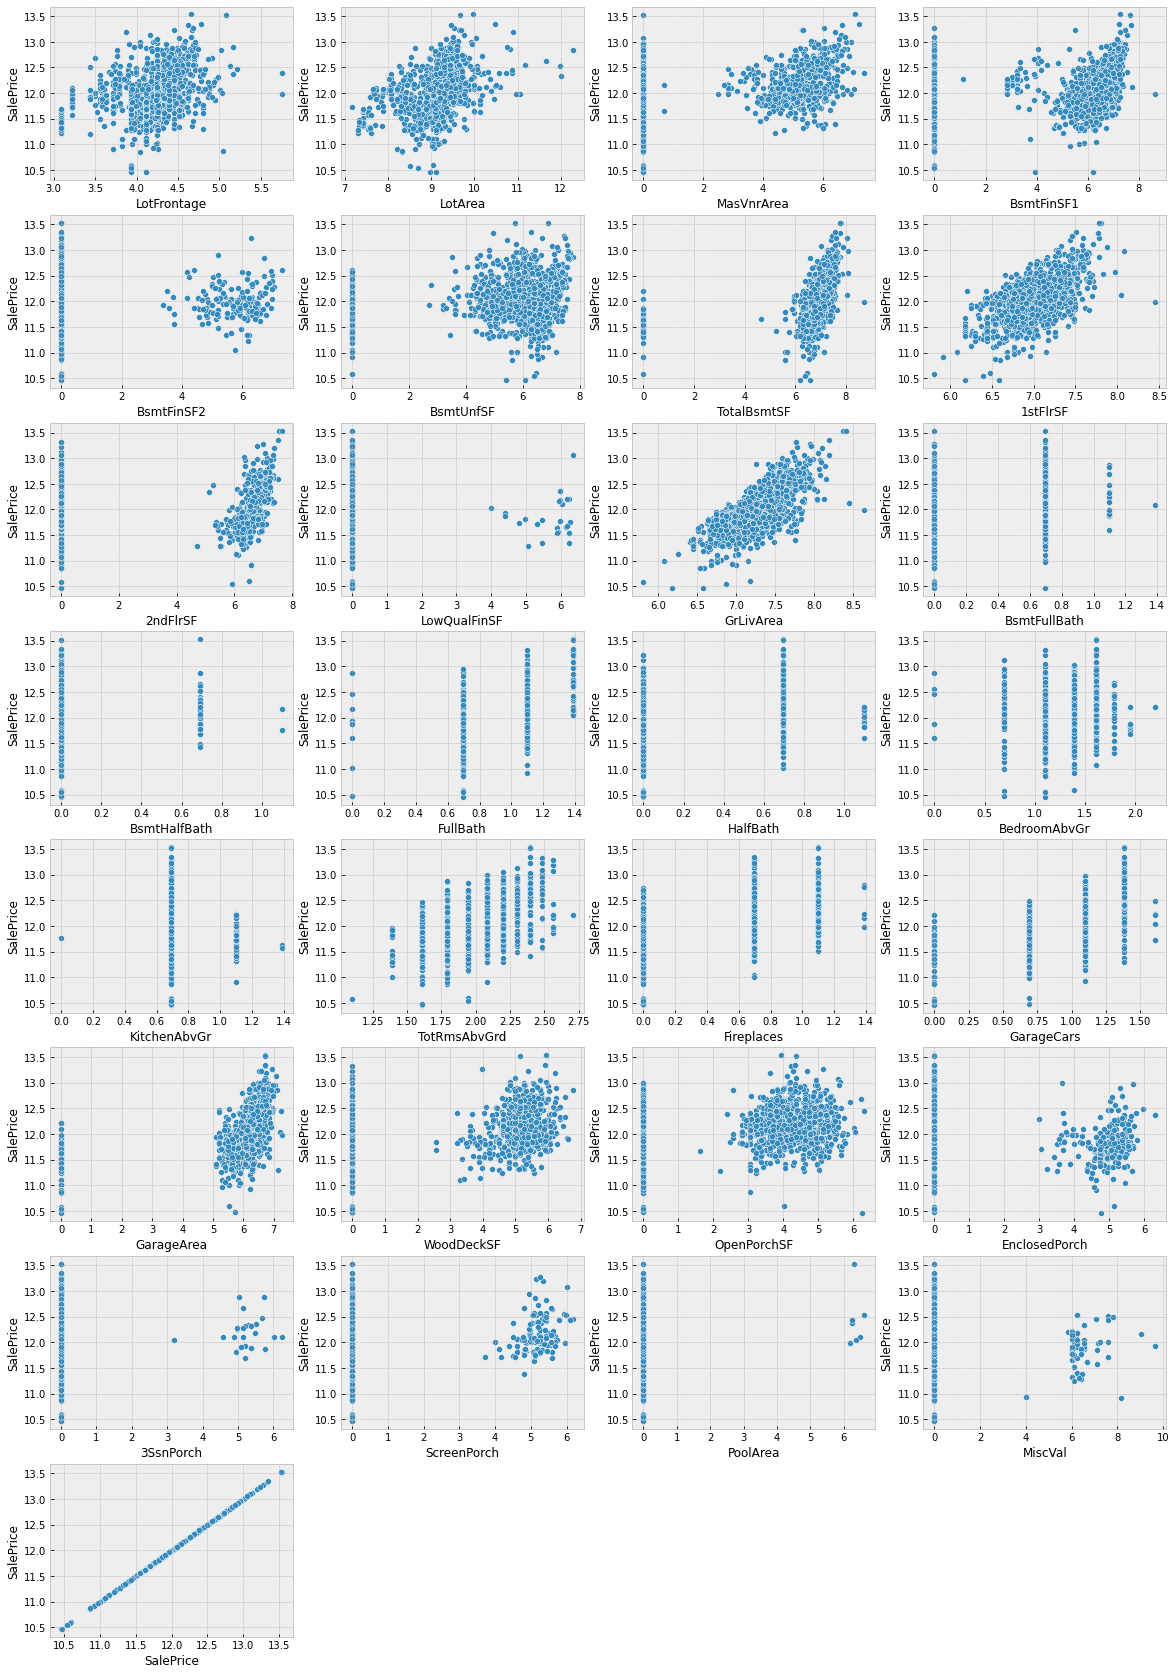

In [43]:
# Plotting scatterplots for every column vs SalePrice column

plt.figure(figsize=(20,30))
for i,col in enumerate(numericalCols):
    # There are 29 numerical columns
    plt.subplot(8,4,i+1)
    sns.scatterplot(x=col, y='SalePrice',data=housingDataset)

From the above plots, we can see there are several columns with good correlation with the target column i.e __SalePrice__.
Let's visualize these correlations along with the correlation among the numerical columns to see how strongly they are correlated.

For this, we will use a heatmap.

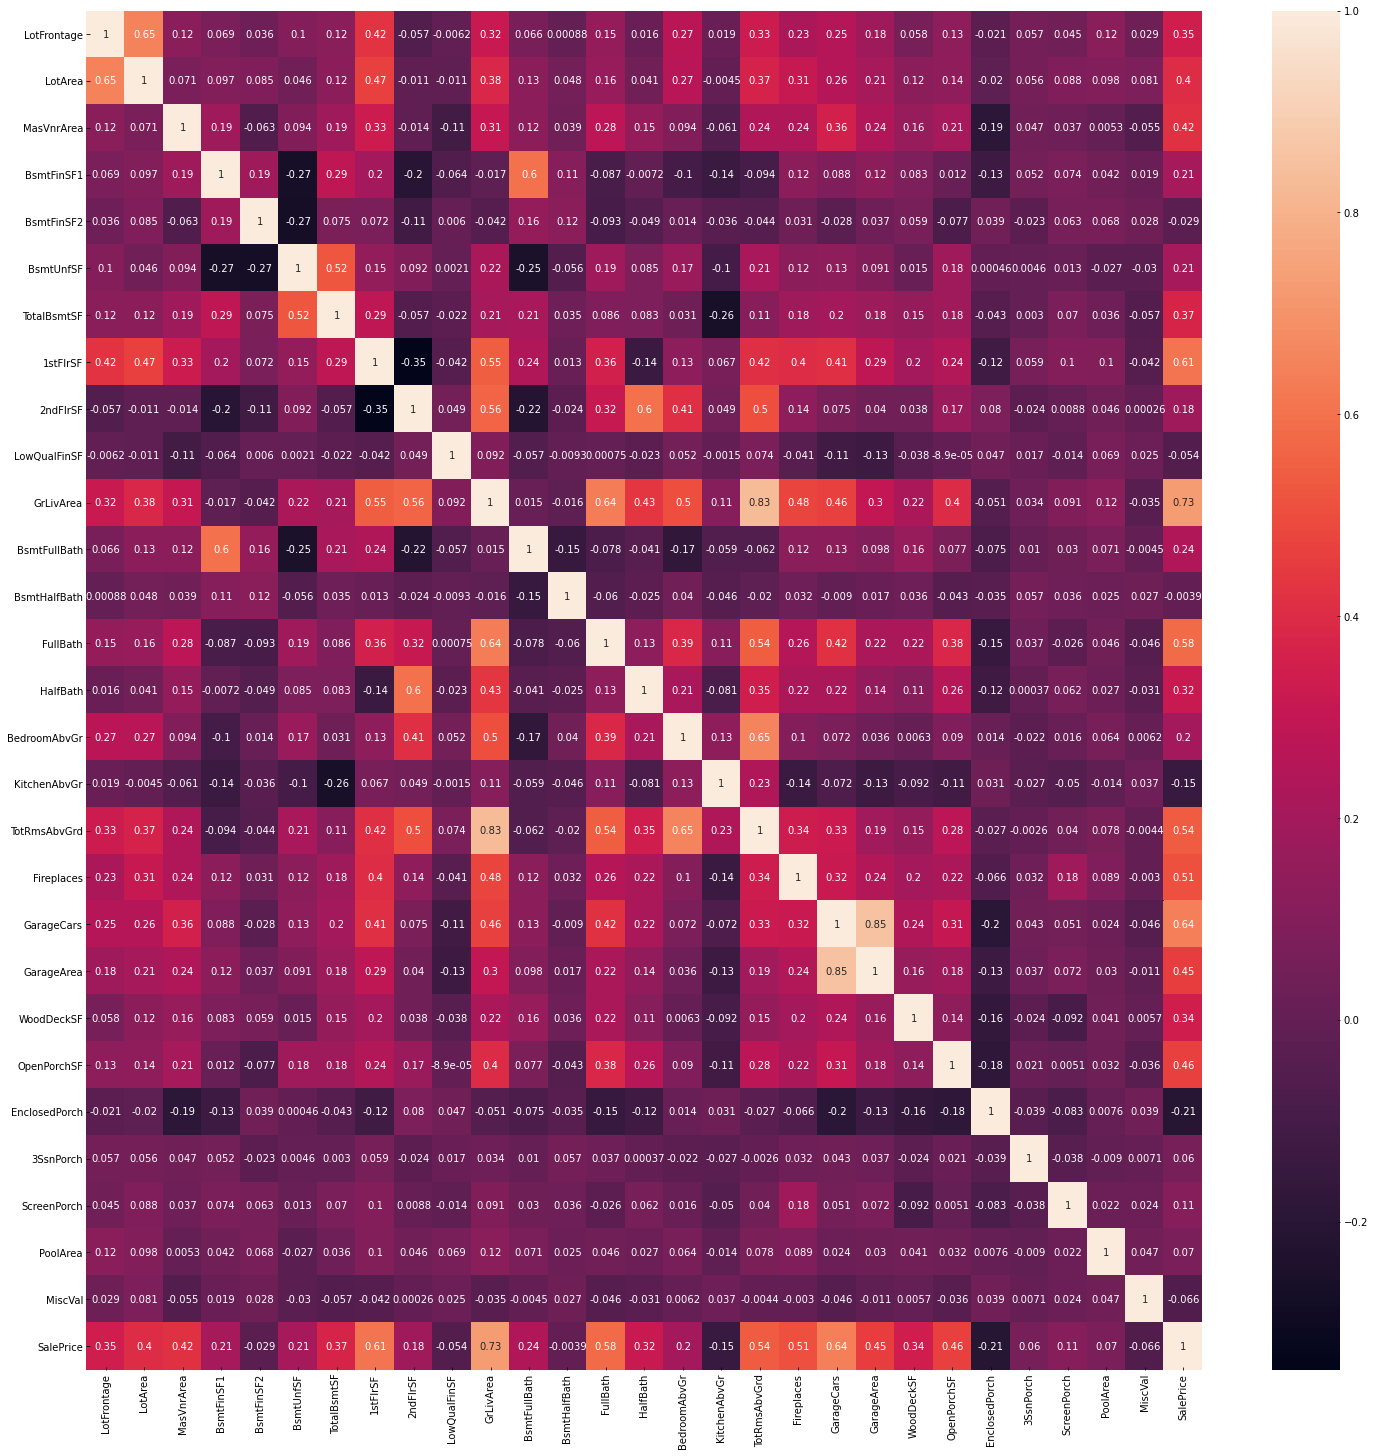

In [44]:
# Plotting heatmap for the numerical columns

plt.figure(figsize=(25,25))
sns.heatmap(data=housingDataset[numericalCols].corr(), annot=True)
plt.show()

From the above heatmap, we can infer the following key observations:
1. 1stFlrSF i.e. 1st Floor Square Feet area is highly positively correlated with the Sale Price of houses (0.61).
2. GrLivArea i.e. Ground Living Area is highly correlated with the Sale Price of houses (0.73).
3. No. of cars that can be fitted into Garage is positively correlated with the Sale Price of houses (0.64).
4. Lot Area and Lot Frontage are highly positively correlated (0.65).
5. Garage Area and GarageCars is very highly correlated(0.85).
6. Total Rooms above Ground is very highly correlated with Ground Living Area (0.83).

Now, we have now understood the relationship among the numerical columns. Let's now analyze the categorical columns.

### Categorical Columns Analysis

Here we'll analyze the categorical columns with the help of boxplots.

Let's see the no. of categorical columns in our dataset

In [45]:
# Creating a list of categorical columns
categoricalCols = list(set(housingDataset.columns)-set(numericalCols))

In [46]:
housingDataset[categoricalCols].shape

(1451, 51)

We have 51 categorical columns, which is very huge. So, it will be very cumbersome to analyze all of them. Also there are lot of categorical columns which have lot of classes (i.e. high cardinality). 

We will now filter out the categorical columns that are not having high cardinality (i.e. classes < 10) and analyze them using boxplots.

In [47]:
# Filtering out the columns having classes less than 10 and those with classes more than 10

nonHighCardinality = [col for col in categoricalCols if housingDataset[col].nunique() < 10]
highCardinality = [col for col in categoricalCols if housingDataset[col].nunique() >= 10]

Now, let's see out of all the categorical columns how many of them are having high cardinality.

In [48]:
# Printing no. of high cardinality columns

print("No. of high cardinality columns: "+str(len(highCardinality)))
print("No. of non high cardinality columns: "+str(len(nonHighCardinality)))

No. of high cardinality columns: 9
No. of non high cardinality columns: 42


So, we have 42 categorical columns which have classes less than 10 or have low cardinality.<br>
We will plot boxplots for all these columns and analyze them.

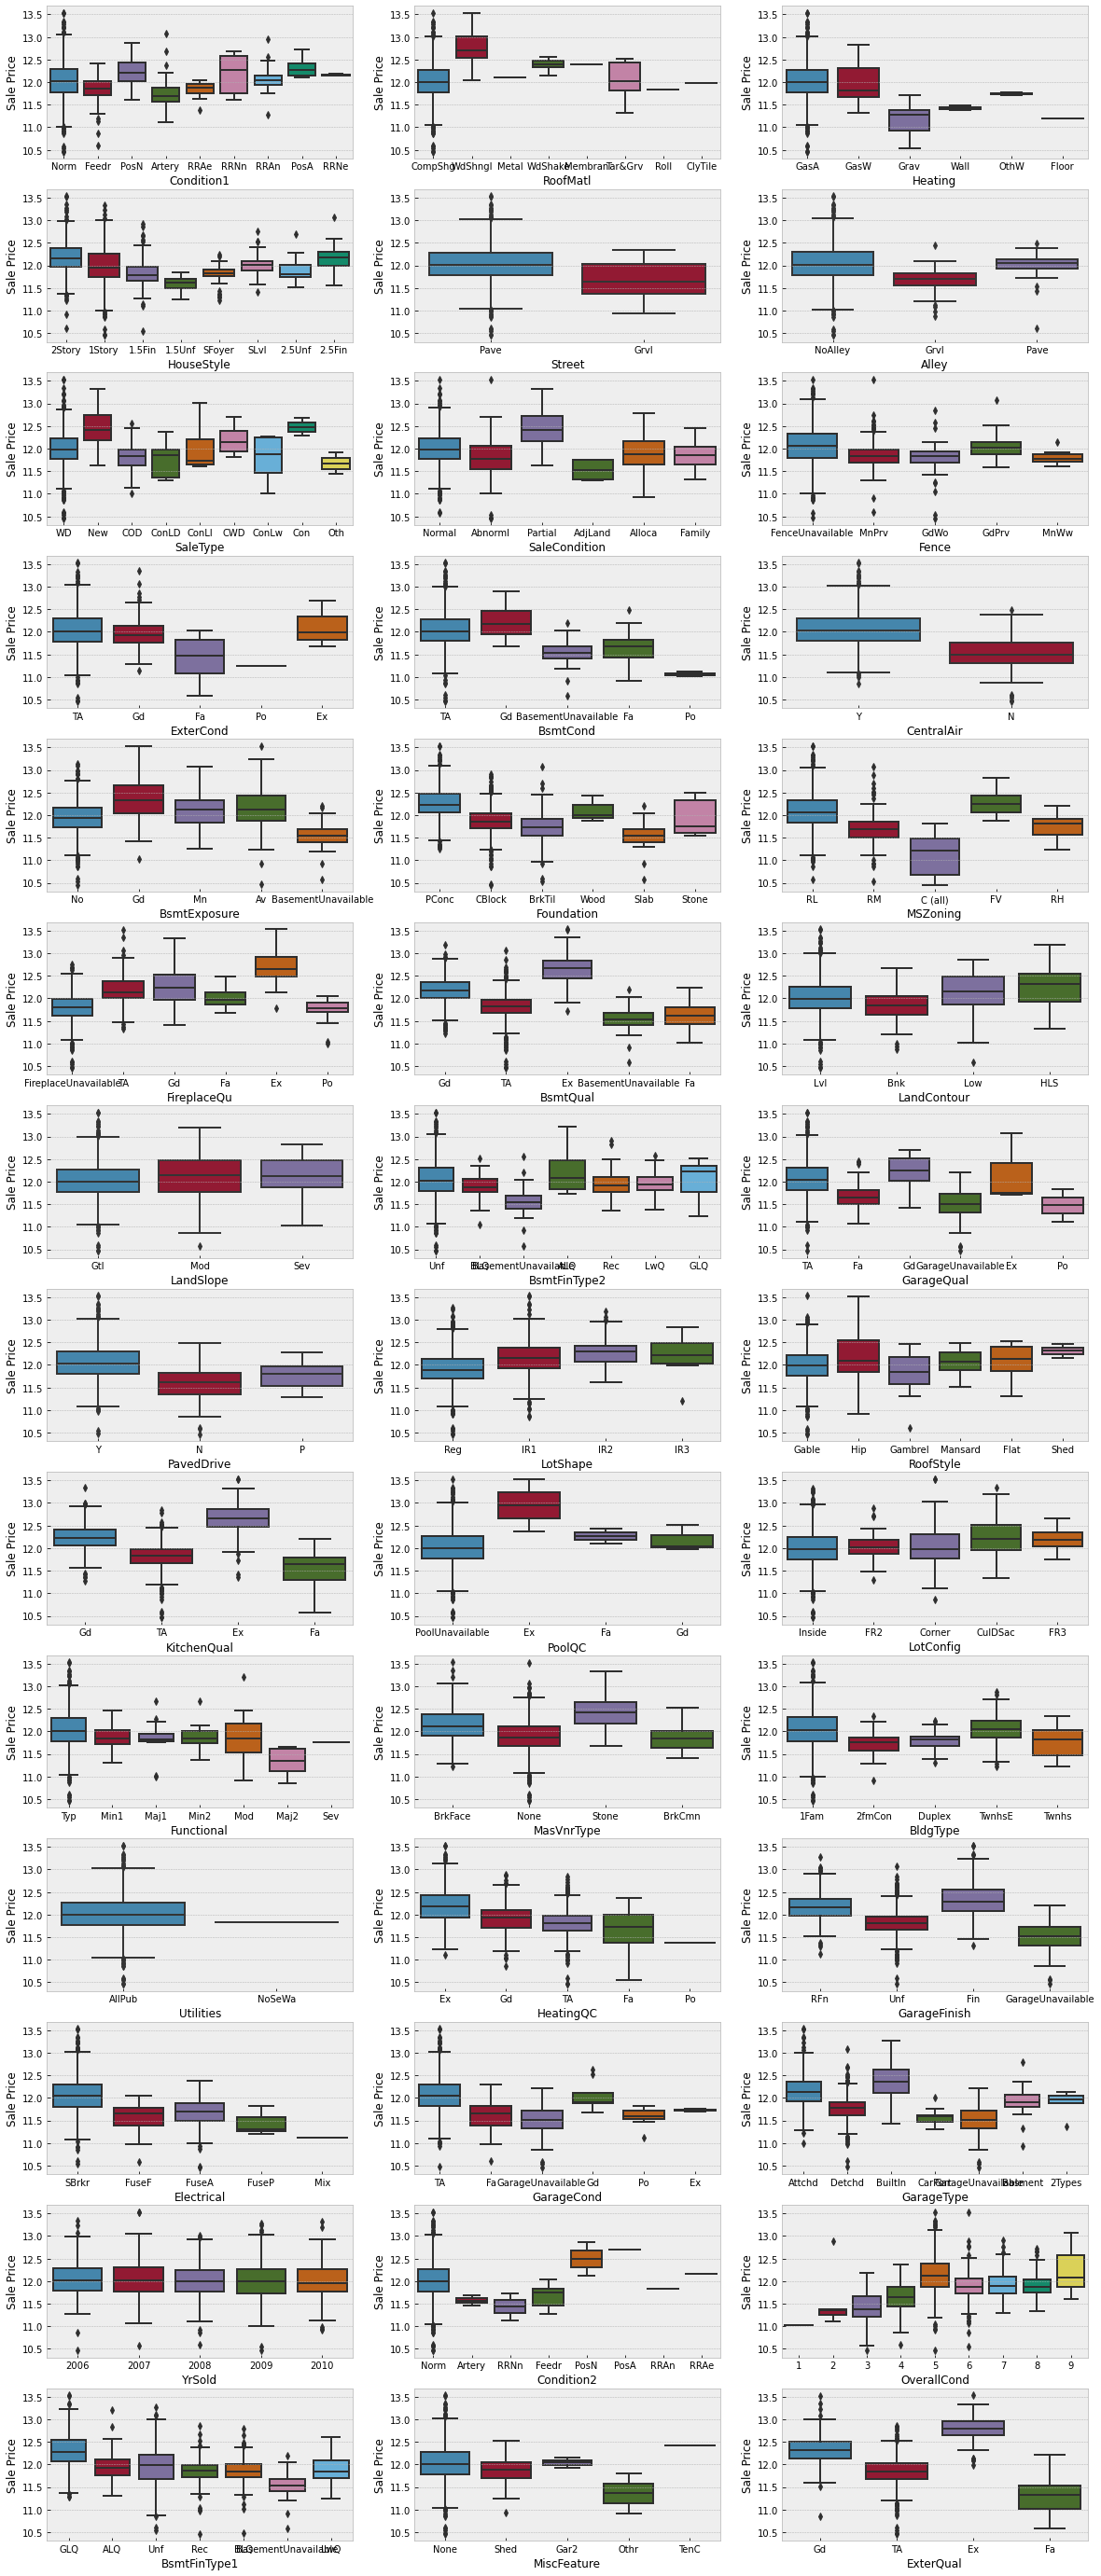

In [49]:
# Plotting boxplots for all the 42 categorical columns w.r.t. Sale Price

plt.figure(figsize=(20,50))
for i in range(len(nonHighCardinality)):
    plt.subplot(14,3,i+1)
    sns.boxplot(x=nonHighCardinality[i], y='SalePrice', data=housingDataset)
    plt.xlabel(nonHighCardinality[i])
    plt.ylabel("Sale Price")

__From the above boxplots we can infer the following details :__
1. House with higher quality gas heating system tend to have higher sale price.
2. House Foundation of concrete or wood are having higher sale price.
3. Sale Price of house is high for houses with Paved streets.
4. Sale Price of house is very low for houses with no Garages or having less garage area.
5. Higher the no. of floors in the house higher is the Sales price.
6. If the overall condition of house is good, they tend to have higher price.
7. House which are newly constructed have comparatively very high sale price than other sale types.
8. Houses with Pool or high quality pools tend to have higher sale price.
9. Higher the quality of kitchens higher will be the Sale Price of the house.
10. Sale Price of house is more when Central Airconditioning is available.
11. Sale Price of house is low if the quality of basement is poor or if there's no basement.
12. Houses with Standard Circuit breaker in electrical fitting have higher sale price.
13. Houses with no fire places have lower Sale price.
14. Houses in Residential Areas tend to have higher Sale price.
15. Houses with wooden roof are having higher sale price.
16. Sale Price of house is more for high quality external material.
17. Houses with close proximity to public parks or railroads tend to have higher sale prices.


Let's dive deeper into these categorical columns to see what more information we can get.

We will plot the following multivariate subplots :
1. House Style-Land Slope vs Sale Price
2. Zoning-Year Sold vs Sale Price

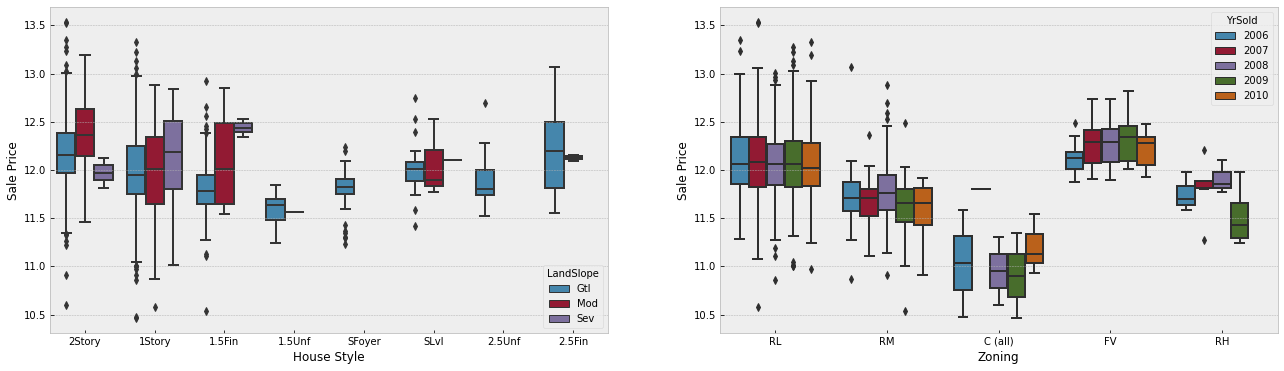

In [50]:
# Plotting box plots with multiple categorical columns

plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.boxplot(x='HouseStyle', y='SalePrice', hue='LandSlope',data=housingDataset)
plt.xlabel('House Style')
plt.ylabel("Sale Price")

plt.subplot(1,2,2)
sns.boxplot(x='MSZoning', y='SalePrice', hue='YrSold',data=housingDataset)
plt.xlabel('Zoning')
plt.ylabel("Sale Price")

plt.show()

We can conclude from the above plots, that there are similar patterns seen for every segment of different categories. Also, for 1 floor buildings with Severe land slope are having higher Sale Price. For Zoning, it is showing similar pattern for different years on which property was sold.

With this we are done with the __Data Understanding and Analysis__.
    We will now start preparing our data to be inputted into the model building phase.

# 3. DATA PREPARATION
We will now prepare our data and make it ready for the analysis. Here, we will perform the following tasks:
- Create Derived Metrics
- Perform Dummy encoding for Categorical Columns

## Derived Metrics

There can be some important patterns in the data which might not get captured with the the original columns provided in the dataset. So, here we will create some derived metrics which could help us find out those hidden patterns during the model building process.

First, let's look at our dataset to decide the derived metrics that can be created.

In [51]:
# Priting dataset sample

housingDataset.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1149,70,RM,3.931826,9.105091,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2Story,7,9,1920,1988,Hip,CompShg,VinylSd,VinylSd,None,...,0.000000,FireplaceUnavailable,Detchd,1930,Unf,1.098612,5.783825,TA,TA,Y,0.00000,0.000000,0.0,0.0,0.000000,0.0,PoolUnavailable,FenceUnavailable,None,0.0,7,2009,WD,Normal,11.870607
1028,50,RL,4.382027,9.158310,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,5,1941,1950,Gable,CompShg,WdShing,Wd Shng,None,...,0.693147,Gd,Attchd,1941,Unf,0.693147,5.484797,TA,TA,Y,0.00000,0.000000,0.0,0.0,0.000000,0.0,PoolUnavailable,FenceUnavailable,None,0.0,4,2007,WD,Normal,11.561725
1343,50,RL,4.060443,8.930494,Pave,NoAlley,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,...,0.693147,TA,Detchd,1929,Unf,1.098612,5.837730,Fa,Fa,Y,0.00000,0.000000,0.0,0.0,0.000000,0.0,PoolUnavailable,FenceUnavailable,None,0.0,3,2009,WD,Normal,12.083911
866,20,RL,4.219508,9.273972,Pave,NoAlley,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,...,0.693147,Gd,Attchd,2007,RFn,1.386294,6.769642,TA,TA,Y,5.26269,4.394449,0.0,0.0,0.000000,0.0,PoolUnavailable,FenceUnavailable,None,0.0,11,2007,New,Partial,12.424811
1184,20,RL,3.931826,10.466925,Grvl,NoAlley,Reg,Lvl,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,5,4,1963,1963,Hip,CompShg,MetalSd,MetalSd,BrkFace,...,1.098612,TA,2Types,1963,RFn,1.386294,6.903747,TA,TA,Y,0.00000,5.575949,0.0,0.0,5.575949,0.0,PoolUnavailable,FenceUnavailable,None,0.0,5,2007,WD,Normal,12.137264


__We will create the following derived columns :__
1. `AreaPerRoom (GrLivArea/TotRmsAbvGrd)` : Area per room of a house
2. `BedroomPerBathroom (BedroomAbvGr/FullBath+HalfBath)` : No. of bedrooms for every bathroom
3. `TotalSqFt (TotalBsmtSF+1stFlrSF+2ndFlrSF)` : Total Square feet area including basement
4. `AvgLotArea_Zone (Average LotArea for every MSZoning)`: Average lot area for every zoning of land
5. `AvgLotArea_Neighborhood (Average LotArea for every Neighborhood)`: Average lot area for every neighborhood
6. `HouseAge (YrSold - YrBuilt)` : Age of house
7. `AvgAge_SaleCond (Average HouseAge for every Sale Condition)`: Average Age of house for different Sale conditions
8. `Remodification_Age (YrSold - YearRemodAdd)`: Age of house since last remodification at the time of sale
9. `HQ_BasementHouse (1 when BsmtQual and OverallQual are high otherwise 0)`: High quality basement and overall condition of house
10. `EssentialSystems (1 if Fireplace, Central Air Conditioning and other utilities is available otherwise 0)`: Fireplace, Central Air Conditioning and all utilities like Electrical, Gas etc are provided.

In [52]:
# Creating a derived metric "AreaPerRoom"
housingDataset['AreaPerRoom'] = housingDataset['GrLivArea']/housingDataset['TotRmsAbvGrd']

# Checking if the derived column is created
housingDataset[['GrLivArea','TotRmsAbvGrd','AreaPerRoom']].sample(5)

,GrLivArea,TotRmsAbvGrd,AreaPerRoom
666,7.775276,2.079442,3.739117
549,7.647309,2.197225,3.480440
1361,7.333676,2.079442,3.526753
800,7.431892,2.197225,3.382400
780,7.134094,1.945910,3.666199


Now, __AreaPerBedroom__ is created. Now, let's create the second one i.e.__BedroomPerBathroom__.

In [53]:
# Creating a derived metric "BedroomPerBathroom"
housingDataset['BedroomPerBathroom'] = (housingDataset['BedroomAbvGr']
                                        /(housingDataset['FullBath']+housingDataset['HalfBath']+1e-10))

# Checking if the derived column is created
housingDataset[['BedroomAbvGr','FullBath','HalfBath','BedroomPerBathroom']].sample(5)

,BedroomAbvGr,FullBath,HalfBath,BedroomPerBathroom
403,1.609438,1.098612,0.693147,0.898244
77,1.098612,0.693147,0.000000,1.584963
404,1.386294,1.098612,0.693147,0.773706
311,1.098612,0.693147,0.000000,1.584963
588,0.693147,0.693147,0.000000,1.000000


We have now created __BedroomPerBathroom__. Now, we will create __TotalSqFt__.

In [54]:
# Creating a derived metric "TotalSqFt"
housingDataset['TotalSqFt'] = housingDataset['TotalBsmtSF']+housingDataset['1stFlrSF']+housingDataset['2ndFlrSF']

# Checking if the derived column is created
housingDataset[['TotalBsmtSF','1stFlrSF','2ndFlrSF','TotalSqFt']].sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotalSqFt
851,7.149917,7.284135,0.000000,14.434052
356,7.055313,7.063048,0.000000,14.118361
1092,7.074963,7.237778,5.720312,20.033053
865,6.910751,6.910751,0.000000,13.821502
959,6.546785,6.546785,6.580639,19.674210


Now, we will create another derived column __AvgLotArea_Zone__.

In [55]:
# Creating a list of zones in MSZoning column
zones = list(housingDataset['MSZoning'].unique())

# Initializing the AvgLotArea_Zone with 0
housingDataset['AvgLotArea_Zone'] = 0

# Creating derived column AvgLotArea_Zone
for zone in zones:
    # Determining mean area for every zone
    avgArea = housingDataset[housingDataset['MSZoning'] == zone]['LotArea'].mean()
    
    # Assigning average area to AvgLotArea_Zone column for the houses in that zone
    housingDataset.loc[housingDataset['MSZoning'] == zone,'AvgLotArea_Zone'] = avgArea
    
    
# Checking if the derived column is created
housingDataset[['MSZoning','LotArea','AvgLotArea_Zone']].sample(5)

,MSZoning,LotArea,AvgLotArea_Zone
1441,RM,8.395477,8.610621
515,RL,9.410911,9.233557
696,RM,8.699681,8.610621
1069,RL,9.169623,9.233557
1439,RL,9.357466,9.233557


__AvgLotArea_Zone__ is now created. Now, let's create our next derived column __AvgLotArea_Neighborhood__.

In [56]:
# Creating a list of values in Neighborhood column
neighborhood = list(housingDataset['Neighborhood'].unique())

# Initializing the AvgLotArea_Neighborhood with 0
housingDataset['AvgLotArea_Neighborhood'] = 0

# Creating derived column AvgLotArea_Neighborhood
for hood in neighborhood:
    # Determining mean area for every hood
    avgArea = housingDataset[housingDataset['Neighborhood'] == hood]['LotArea'].mean()
    
    # Assigning average area to AvgLotArea_Neighborhood column for the houses in that hood
    housingDataset.loc[housingDataset['Neighborhood'] == hood,'AvgLotArea_Neighborhood'] = avgArea
    
    
# Checking if the derived column is created
housingDataset[['Neighborhood','LotArea','AvgLotArea_Neighborhood']].sample(5)

,Neighborhood,LotArea,AvgLotArea_Neighborhood
83,NAmes,9.093020,9.186049
1134,Gilbert,9.079548,9.283990
165,Edwards,9.220984,9.112112
493,NAmes,8.978660,9.186049
1457,Crawfor,9.109746,9.260061


Now, we'll create __HouseAge__ derived variable.

In [57]:
# Creating a derived metric "HouseAge"
housingDataset['HouseAge'] = housingDataset['YrSold'].astype('int') - housingDataset['YearBuilt'].astype('int')

# Checking if the derived column is created
housingDataset[['YrSold','YearBuilt','HouseAge']].sample(5)

,YrSold,YearBuilt,HouseAge
493,2008,1960,48
822,2007,2003,4
329,2009,1920,89
925,2008,1977,31
1078,2006,2004,2


We have created __HouseAge__, now let's create __AvgAge_SaleCond__.

In [58]:
# Creating a list of values in SaleCondition column
condGrade = list(housingDataset['SaleCondition'].unique())

# Initializing the AvgLotArea_Neighborhood with 0
housingDataset['AvgAge_SaleCond'] = 0

# Creating derived column AvgLotArea_Neighborhood
for grade in condGrade:
    # Determining mean area for every hood
    avgAge = housingDataset[housingDataset['SaleCondition'] == grade]['HouseAge'].mean()
    
    # Assigning average area to AvgLotArea_Neighborhood column for the houses in that hood
    housingDataset.loc[housingDataset['SaleCondition'] == grade,'AvgAge_SaleCond'] = avgAge
    
    
# Checking if the derived column is created
housingDataset[['SaleCondition','HouseAge','AvgAge_SaleCond']].sample(5)

,SaleCondition,HouseAge,AvgAge_SaleCond
809,Normal,111,39.010059
1332,Normal,71,39.010059
10,Normal,43,39.010059
29,Normal,81,39.010059
705,Normal,80,39.010059


We will create another derived column which is __Remodification_Age__.

In [59]:
# Creating a derived metric "Remodification_Age"
housingDataset['Remodification_Age'] = housingDataset['YrSold'].astype('int') - housingDataset['YearRemodAdd'].astype('int')

# Checking if the derived column is created
housingDataset[['YrSold','YearRemodAdd','Remodification_Age']].sample(5)

,YrSold,YearRemodAdd,Remodification_Age
368,2010,1954,56
343,2008,2005,3
247,2006,1954,52
1127,2007,2004,3
209,2008,1964,44


Now, we will create another derived column i.e. __HQ_BasementHouse__. We will create this to tell if the basement and overall house quality is great.

In [60]:
# Creating a derived column HQ_BasementHouse based on BsmtQual and OverallQual
housingDataset['HQ_BasementHouse'] = np.where((housingDataset['BsmtQual']
                                           .isin(['Gd','Ex'])) 
                                          & (housingDataset['OverallQual'].isin([8,9,10]))
                                          ,1,0)

# Checking if the derived column is created
housingDataset[['BsmtQual','OverallQual','HQ_BasementHouse']].sample(5)

,BsmtQual,OverallQual,HQ_BasementHouse
1185,TA,5,0
60,Gd,6,0
1128,Gd,7,0
1129,Gd,5,0
274,TA,5,0


Now, we will add our last derived column i.e. __EssentialSystems__, which will tell if all the essential systems/utilities are provided in the house.

In [61]:
# Creating a derived column EssentialSystems based on Utilities,CentralAir and Fireplaces
housingDataset['EssentialSystems'] = np.where((housingDataset['Utilities']=='AllPub')
                                              & (housingDataset['CentralAir']=='Y') 
                                              & (housingDataset['Fireplaces']>0),1,0)

# Checking if the derived column is created
housingDataset[['Utilities','CentralAir','Fireplaces','EssentialSystems']].sample(5)

,Utilities,CentralAir,Fireplaces,EssentialSystems
1312,AllPub,Y,0.693147,1
1033,AllPub,Y,0.000000,0
857,AllPub,Y,0.693147,1
874,AllPub,Y,0.000000,0
1198,AllPub,Y,0.000000,0


With this, we have created __ten derived columns__ which can be further used to improve our analysis. Now, we should proceed with the next task i.e. perform dummy encoding on categorical columns.

Let's look at a sample of our data.

In [62]:
# Priting dataset sample

housingDataset.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AreaPerRoom,BedroomPerBathroom,TotalSqFt,AvgLotArea_Zone,AvgLotArea_Neighborhood,HouseAge,AvgAge_SaleCond,Remodification_Age,HQ_BasementHouse,EssentialSystems
1134,60,RL,4.060443,9.079548,Pave,NoAlley,IR1,HLS,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,...,4.615121,3.663562,0.000000,0.0,0.0,0.0,PoolUnavailable,FenceUnavailable,None,0.000000,8,2007,WD,Normal,12.037660,3.548253,0.773706,20.171634,9.233557,9.283990,10,39.010059,10,0,1
307,50,RM,4.248495,8.977273,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,...,0.000000,4.976734,0.000000,0.0,0.0,0.0,PoolUnavailable,MnPrv,None,0.000000,3,2008,WD,Normal,11.402005,3.725360,2.000000,18.630337,8.610621,8.958557,88,39.010059,58,0,0
24,20,RL,4.248495,9.017605,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,...,6.008813,4.510860,0.000000,0.0,0.0,0.0,PoolUnavailable,MnPrv,None,0.000000,5,2010,WD,Normal,11.944714,3.580313,2.000000,13.933934,9.233557,9.211174,42,39.010059,9,0,1
1200,20,RL,4.276666,9.143559,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,MetalSd,MetalSd,None,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,PoolUnavailable,FenceUnavailable,Shed,0.000000,7,2006,Oth,Abnorml,11.661785,3.774351,2.000000,13.525459,9.233557,9.186049,36,48.603960,36,0,0
1230,90,RL,4.248495,9.846441,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,...,5.049856,3.218876,4.983607,0.0,0.0,0.0,PoolUnavailable,FenceUnavailable,Gar2,9.024131,8,2007,WD,Normal,12.154785,3.068798,0.732487,21.572286,9.233557,9.211174,30,39.010059,30,0,1


As we know from our previous steps, in our dataset :
- We have __37 numerical columns__
- We have __53 categorical columns__
    - 2 binary column
    - 42 columns have classes less than 10
    - 9 columns have high cardinality i.e. classes >=10

So, now we need to convert the __51 categorical columns (excluding the Binary Column)__ into numerical columns. We will use dummy encoding for this purpose. Since, we have huge number of columns we won't just create dummy variables as this will add a lot of columns for the categorical columns with high cardinality.

__We will proceed with the following steps:__
1. We will first check the high cardinality columns and select the columns that don't have very high number of classes.
2. Then will be left with very high cardinality columns i.e. classes >=20. We will group their classes
3. We will convert all the categorical columns to dummy variables.

So, now we will check the no. of classes for high cardinality columns.

In [63]:
# Checking no. of classes for high cardinality columns

for col in highCardinality:
    print("Column Name: "+col)
    print("No. of classes: "+str(housingDataset[col].nunique()))
    print("-----------------------")

Column Name: MoSold
No. of classes: 12
-----------------------
Column Name: Exterior1st
No. of classes: 15
-----------------------
Column Name: YearBuilt
No. of classes: 112
-----------------------
Column Name: YearRemodAdd
No. of classes: 61
-----------------------
Column Name: OverallQual
No. of classes: 10
-----------------------
Column Name: Neighborhood
No. of classes: 25
-----------------------
Column Name: Exterior2nd
No. of classes: 16
-----------------------
Column Name: GarageYrBlt
No. of classes: 98
-----------------------
Column Name: MSSubClass
No. of classes: 15
-----------------------


__So, we can see that we have the following columns which have classes less than 20:__
1. MoSold
2. Exterior2nd
3. Exterior1st
4. MSSubClass
5. OverallQual

Now, we will convert these columns along with low cardinality columns to dummy variables.

In [64]:
# Adding the new columns to LowCardinality list

nonHighCardinality.extend(['MoSold','Exterior2nd','Exterior1st','MSSubClass','OverallQual'])
len(nonHighCardinality)

47

Now, we will make groups in High Cardinality columns for the ease of dummy varible creation. We will group the following columns:
1. YearRemodAdd
2. GarageYrBlt
3. YearBuilt
4. Neighborhood

Among these, three columns represent year. We can group the years into decades. For eg. 1992 will be in Decade_1990 group, similarly 2008 will fall in Decade_2000 group.

For grouping the years into decades we will create a function.

In [65]:
def yearToDecade(yr):
    # Converting yr to string
    yr = str(yr).replace(".0","")
    
    if yr.isnumeric():
        # Convert to decade and return
        yr = "Decade_"+yr[:3]+"0"
        return yr
    else:
        return yr

Now, we will apply this method to all the columns representing year.

In [66]:
# Grouping year representing columns to decades

for yrCol in ['YearRemodAdd','GarageYrBlt','YearBuilt']:
    housingDataset[yrCol] = housingDataset[yrCol].apply(yearToDecade)

    
# Checking sample of the year columns to see if the grouping has been perforemed properly

housingDataset[['YearRemodAdd','GarageYrBlt','YearBuilt']].sample(10)

,YearRemodAdd,GarageYrBlt,YearBuilt
835,Decade_1990,Decade_1990,Decade_1950
603,Decade_2000,Decade_2000,Decade_2000
900,Decade_1970,Decade_1970,Decade_1970
887,Decade_1950,Decade_1950,Decade_1950
1051,Decade_2000,Decade_2000,Decade_2000
409,Decade_2000,Decade_2000,Decade_2000
312,Decade_1950,Decade_1930,Decade_1930
724,Decade_2000,Decade_2000,Decade_2000
1112,Decade_1950,Decade_1950,Decade_1950
304,Decade_2000,Decade_2000,Decade_1880


Now, we have grouped the year columns. Now, let's group the __Neighborhood__ column. For this, we will check the value counts of the it's different classes to decide the grouping.

In [67]:
# Determining the value count proportion of different classes of Neighborhood

neighborhood_classes = housingDataset['Neighborhood'].value_counts(1)*100
neighborhood_classes

NAmes      15.506547
CollgCr    10.268780
OldTown     7.787733
Edwards     6.891799
Somerst     5.720193
Gilbert     5.375603
NridgHt     5.237767
Sawyer      5.099931
NWAmes      5.031013
SawyerW     3.997243
BrkSide     3.997243
Crawfor     3.445899
Mitchel     3.376981
NoRidge     2.825637
Timber      2.549966
IDOTRR      2.549966
ClearCr     1.929704
SWISU       1.722950
StoneBr     1.722950
MeadowV     1.171606
Blmngtn     1.171606
BrDale      1.102688
Veenker     0.758098
NPkVill     0.620262
Blueste     0.137836
Name: Neighborhood, dtype: float64

Here, we can see many of the classes have very less frequency in the dataset. So, we can group the classes with low frequency to the number of classes for this column.

We wil group the classes with less than 2.5% frequency in a class named as __Others__.

In [68]:
# Creating a list of low frequency class (frequency <2.5%)
lowFreqClass = [place for place in neighborhood_classes.index if neighborhood_classes[place]<2.5]

# Grouping the low frequency classes into "Others" class
housingDataset.loc[housingDataset['Neighborhood'].isin(lowFreqClass),'Neighborhood'] = 'Others'

Now, let's look at the classes for Neighborhood column

In [69]:
# Printing classes and no. of classes for Neighborhood column

print(housingDataset['Neighborhood'].value_counts())
print(housingDataset.Neighborhood.nunique())

NAmes      225
Others     150
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     41
Timber      37
IDOTRR      37
Name: Neighborhood, dtype: int64
17


So, we reduced the classes from 25 to 17 for Neighborhood, which is better.

Now, let's check whether the classes of all the high cardinality columns have reduced. 

In [70]:
# Checking no. of classes for high cardinality columns

for col in highCardinality:
    print("Column Name: "+col)
    print("No. of classes: "+str(housingDataset[col].nunique()))
    print("-----------------------")

Column Name: MoSold
No. of classes: 12
-----------------------
Column Name: Exterior1st
No. of classes: 15
-----------------------
Column Name: YearBuilt
No. of classes: 15
-----------------------
Column Name: YearRemodAdd
No. of classes: 7
-----------------------
Column Name: OverallQual
No. of classes: 10
-----------------------
Column Name: Neighborhood
No. of classes: 17
-----------------------
Column Name: Exterior2nd
No. of classes: 16
-----------------------
Column Name: GarageYrBlt
No. of classes: 13
-----------------------
Column Name: MSSubClass
No. of classes: 15
-----------------------


<mark>So, all of them have reduced under 20 now. We'll now convert all the categorical columns to Dummy Variables.</mark>

## Dummy Encoding

We have now reduced the no. of classes in our categorical columns and all of them have less than 20 classes. So, now let's look at a sample of data.

In [71]:
housingDataset.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AreaPerRoom,BedroomPerBathroom,TotalSqFt,AvgLotArea_Zone,AvgLotArea_Neighborhood,HouseAge,AvgAge_SaleCond,Remodification_Age,HQ_BasementHouse,EssentialSystems
388,20,RL,4.543295,9.146655,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,Decade_1990,Decade_2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,4.795791,3.258097,0.000000,0.0,0.0,0.0,PoolUnavailable,FenceUnavailable,None,0.0,7,2008,WD,Normal,12.160034,3.751354,1.261860,14.592135,9.233557,9.138700,9,39.010059,8,0,0
127,45,RM,4.025352,8.386857,Pave,NoAlley,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,Decade_1930,Decade_1950,Gable,CompShg,WdShing,Wd Sdng,None,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,PoolUnavailable,FenceUnavailable,None,0.0,6,2007,WD,Normal,11.373675,3.758647,2.000000,13.246337,8.610621,8.939826,77,39.010059,57,0,1
909,60,RL,5.010635,9.440658,Pave,NoAlley,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Decade_2000,Decade_2000,Gable,CompShg,VinylSd,VinylSd,None,...,3.610918,3.218876,0.000000,0.0,0.0,0.0,PoolUnavailable,FenceUnavailable,None,0.0,6,2009,WD,Normal,12.066816,3.323816,0.773706,19.832088,9.233557,9.283990,4,39.010059,4,0,1
555,45,RM,4.077537,8.761080,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,5,6,Decade_1920,Decade_1950,Gable,CompShg,MetalSd,MetalSd,None,...,0.000000,0.000000,4.762174,0.0,0.0,0.0,PoolUnavailable,FenceUnavailable,None,0.0,8,2006,WD,Normal,11.635152,3.881990,1.584963,13.857330,8.610621,8.857383,84,39.010059,56,0,1
209,20,RL,4.330733,9.018090,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,Decade_1960,Decade_1960,Hip,CompShg,HdBoard,HdBoard,Stone,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,PoolUnavailable,MnPrv,None,0.0,7,2008,WD,Normal,11.884496,3.595583,2.000000,13.993363,9.233557,9.186049,44,39.010059,44,0,0


As per the Data Dictionary and our earlier analysis of categorical columns, we found out that there are few categorical columns which have redundant columns which represent the same thing. 

Eg. for columns representing information about the basement. The _BsmtCond, BsmtQual,BsmtExposure_ have a common class called __BasementUnavailable__ which tells that the basement is not available in that house. So, this redundancy needs to be handled.

<mark>By looking at the Data Dictionary we have found that columns representing information about __Basement and Garage__ have such redundancy.</mark>

So, we will perform Dummy Encoding __without the drop_first__ argument for the following columns:
1. BsmtQual
2. BsmtCond
3. BsmtExposure
4. BsmtFinType1
5. BsmtFinType2
6. GarageType
7. GarageYrBlt
8. GarageFinish
9. GarageQual
10. GarageCond

In [72]:
# Creating a list of redundant class containing columns

redundantClassCols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                      'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

nonRedundantClassCols = list(set(categoricalCols)-set(redundantClassCols))

In [73]:
# Creating dummy variables using get_dummies() method of Pandas
# Concating the dummy variables to original dataframe

for col in redundantClassCols:
    # Creating dummies
    dummy = pd.get_dummies(housingDataset[col], prefix=col)
    
    # Dropping the redundant dummy column
    pre = "Basement" if col.startswith("Bsmt") else "Garage"
    dummy.drop(col+"_"+pre+"Unavailable", axis=1, inplace=True)
    
    # Concating dummies to the dataset
    housingDataset = pd.concat([housingDataset, dummy], axis=1)
    
    # Dropping the original column
    housingDataset.drop(col, axis=1, inplace=True)
    
for col in nonRedundantClassCols:
    # Creating dummies
    dummy = pd.get_dummies(housingDataset[col], prefix=col, drop_first=True)
    
    # Concating dummies to the dataset
    housingDataset = pd.concat([housingDataset, dummy], axis=1)
    
    # Dropping the original column
    housingDataset.drop(col, axis=1, inplace=True)

`So, now we have converted our categorical columns into Dummy Variables.`<br>
Let's now look at the shape of our dataset.

In [74]:
housingDataset.shape

(1451, 332)

Now, we have 332 columns in our dataset. Let's look at the sample of our dataset.

In [75]:
# Checking sample of dataset

housingDataset.sample(5)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
312,4.189655,8.962007,0.000000,6.230481,0.0,5.659482,6.677083,6.677083,5.786897,0.0,7.020191,0.693147,0.0,0.693147,0.000000,1.386294,0.693147,1.791759,0.693147,1.098612,6.018593,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
677,3.970292,9.107532,0.000000,0.000000,0.0,6.645091,6.645091,6.675823,0.000000,0.0,6.675823,0.000000,0.0,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,0.693147,5.484797,5.758902,0.000000,4.795791,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
752,4.382027,9.130972,0.000000,7.090910,0.0,5.634790,7.299797,7.309881,0.000000,0.0,7.309881,0.693147,0.0,1.098612,0.000000,1.386294,0.693147,1.945910,0.000000,1.098612,6.357842,5.129899,3.332205,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1298,5.749393,11.064887,6.680855,8.638525,0.0,6.146329,8.717846,8.453827,6.857514,0.0,8.638171,1.098612,0.0,1.098612,0.693147,1.386294,0.693147,2.564949,1.386294,1.098612,7.257708,5.370638,5.680173,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1268,4.248495,9.554001,6.450470,5.262690,0.0,6.285998,6.591674,7.585281,7.299797,0.0,8.145550,0.000000,0.0,1.386294,0.693147,1.609438,0.693147,2.484907,1.098612,1.386294,6.922644,5.752573,2.564949,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


__We have now created dummy variables from all of our categorical columns. Now, our data contains only numerical columns which can be used for model building__

Now, let's proceed with Train-Test Split.

# 4. TRAIN-TEST SPLIT

In [76]:
# Importing required libraries
from sklearn.model_selection import train_test_split

# Splitting into train and test sets
housing_train, housing_test = train_test_split(housingDataset, train_size = 0.7, random_state = 15)

Now, let's look at our training data to decide our next step.

In [77]:
# Printing a sample of training data

housing_train.sample(10)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
382,4.382027,9.131946,0.000000,0.000000,0.000000,6.845880,6.845880,6.845880,6.755769,0.000000,7.494430,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,2.197225,0.000000,1.098612,6.461468,4.976734,3.988984,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
720,4.248495,8.789355,0.000000,7.046647,0.000000,6.388561,7.463363,7.463363,0.000000,0.000000,7.463363,0.693147,0.000000,1.098612,0.000000,1.098612,0.693147,1.791759,0.693147,1.098612,6.336826,4.744932,3.367296,5.459586,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
869,4.394449,9.204222,5.509388,6.621406,0.000000,5.707110,6.957497,6.968850,6.788972,0.000000,7.575585,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.197225,0.693147,1.098612,6.354370,5.056246,4.510860,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
359,4.369448,9.393661,6.274762,6.863803,0.000000,4.875197,6.991177,6.991177,6.732211,0.000000,7.562681,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,1.098612,6.385194,5.342334,4.330733,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
956,3.218876,7.170888,0.000000,5.655992,0.000000,5.624018,6.331502,6.331502,6.505784,0.000000,7.114769,0.000000,0.000000,0.693147,0.693147,1.098612,0.693147,1.791759,0.693147,1.098612,6.137727,5.017280,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
944,4.248495,9.573315,6.295266,4.718499,5.872118,5.872118,6.709304,7.204149,0.000000,0.000000,7.204149,0.000000,0.693147,0.693147,0.000000,1.386294,0.693147,2.079442,0.693147,1.098612,6.265301,0.000000,4.779123,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
634,4.174387,8.850804,0.000000,6.963190,0.000000,0.000000,6.963190,6.963190,0.000000,0.000000,6.963190,1.098612,0.000000,0.000000,0.000000,0.000000,1.098612,1.609438,0.000000,1.098612,6.357842,5.579730,4.043051,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
933,4.158883,9.046409,5.351858,3.044522,0.000000,7.300473,7.313887,7.313887,0.000000,0.000000,7.313887,0.000000,0.000000,1.098612,0.000000,1.386294,0.693147,1.945910,0.000000,1.098612,6.347389,5.262690,3.610918,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1080,4.394449,9.309371,4.976734,6.487684,0.000000,6.401917,7.138073,7.138073,0.000000,0.000000,7.138073,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.791759,0.000000,1.098612,6.270988,4.025352,0.000000,0.000000,5.379897,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1440,4.382027,9.352447,0.000000,0.000000,0.000000,6.378426,6.378426,7.261225,6.618739,5.953243,7.846199,0.000000,0.000000,1.098612,0.000000,1.386294,0.693147,2.484907,0.693147,1.098612,6.511745,6.068426,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


We can see from the above cell output, the numerical columns doesn't have standard ranges. <mark>So, we will now standardize those numerical columns to bring them in similar scale.</mark>

## Rescaling the features

We will rescale our numerical features using <mark>MinMaxScaler</mark> from sklearn

In [78]:
# Importing MinMaxScaler from sklearn package
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
scaler = MinMaxScaler()

Now, we will use this __scaler__ object to fit and transform our training dataset.

In [79]:
# Modifying the numericalCols list to contain derived column names
numericalCols.extend(['AreaPerRoom','BedroomPerBathroom','TotalSqFt','AvgLotArea_Zone',
                      'AvgLotArea_Neighborhood','HouseAge','AvgAge_SaleCond','Remodification_Age'])

# Fitting and Transforming Training Set using scaler object
housing_train[numericalCols] = scaler.fit_transform(housing_train[numericalCols])

We will now look at our data description to see what changes we have done.

In [80]:
# Printing description of training data

housing_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,...,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,0.423573,0.380646,0.295357,0.494042,0.092660,0.723301,0.775018,0.453018,0.378872,0.013137,0.515498,0.264816,0.037038,0.661638,0.241863,0.604235,0.513748,0.555925,0.286516,0.598807,0.795220,0.360749,0.362456,0.112837,0.014942,...,0.005911,0.010837,0.007882,0.016749,0.001970,0.004926,0.048276,0.001970,0.008867,0.100493,0.202956,0.043350,0.009852,0.038424,0.014778,0.033498,0.057143,0.046305,0.004926,0.021675,0.003941,0.007882,0.011823,0.826601,0.079803
std,0.118804,0.099364,0.372257,0.346134,0.255931,0.243874,0.129901,0.122318,0.431776,0.108345,0.119356,0.318459,0.149608,0.162934,0.311033,0.106173,0.066567,0.133216,0.284656,0.204012,0.208876,0.384099,0.341921,0.276450,0.112082,...,0.076695,0.103588,0.088472,0.128392,0.044368,0.070048,0.214454,0.044368,0.093793,0.300804,0.402398,0.203744,0.098817,0.192311,0.120724,0.180020,0.232230,0.210249,0.070048,0.145691,0.062684,0.088472,0.108141,0.378778,0.271121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.383633,0.347354,0.000000,0.000000,0.000000,0.693588,0.766126,0.365441,0.000000,0.000000,0.431315,0.000000,0.000000,0.500000,0.000000,0.500000,0.500000,0.430677,0.000000,0.430677,0.801918,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.435403,0.389607,0.000000,0.693575,0.000000,0.792398,0.791679,0.447641,0.000000,0.000000,0.523678,0.000000,0.000000,0.792481,0.000000,0.630930,0.500000,0.526456,0.500000,0.682606,0.850652,0.000000,0.510424,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.485634,0.428150,0.726037,0.763689,0.000000,0.862517,0.822244,0.544462,0.863444,0.000000,0.589241,0.630930,0.000000,0.792481,0.630930,0.630930,0.500000,0.609423,0.500000,0.682606,0.876012,0.759467,0.671412,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

    Here, we can see now all of our columns has a minimum value of 0 and maximum value of 1. That's a good thing.
    Now, we will proceed with Model Building.

# 5. MODEL BUILDING

In [81]:
# Importing required libraries

import statsmodels.api as sm

Here, we will first seperate the target and predictor columns.

We will first create the model with all the predictors and see how the model performs with all the predictor variables.

In [82]:
# Seperating predictors and target i.e. X and y

X_train = housing_train.loc[:,housing_train.columns!='SalePrice']
y_train = housing_train['SalePrice'] # As 'SalePrice' is our target column

We need to add intercept to X_train before training as _statsmodels_ doesn't add it by default.

In [83]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train)

# Fitting the model using OLS
lr_model = sm.OLS(y_train, X_train_sm).fit()

Now, we have trained our Linear Regression model with all the predictors. Let's see how it performed by looking at model summary.

In [84]:
# Printing model summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     53.86
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:04:28   Log-Likelihood:                 2238.2
No. Observations:                1015   AIC:                            -3856.
Df Residuals:                     705   BIC:                            -2330.
Df Model:                         309                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

We can observe the following things from the model summary : 
1. __R_Squared__ came very good along with the __Adj. R_Squared__ (i.e. approx 94%).__Though, this could mean that our model is probably overfitting.__
2. __F-Statistic__ value is not that high, which could mean that our model is not very significant. Though, Prob (F-statistic) came as zero, which is great, which tells us it can be a good model.
3. If we look at the __p-values__ for every predictor we can see that there are many predictors which are insignificant for predicting the target. Hence, we should drop some predictors.

Also, because of large number of predictors our model has become very complex or we can say that our model is having <mark>__Low Bias but High Variance__</mark>.

We need to balance the bias and variance of our model for it to be simple enough and yet a good predictor. For this, we will eliminate some features using <mark>__Recursive Feature Elimination (RFE)__</mark> and then will proceed with manual feature elimination, followed with Regularization.

## Feature Elimination
We have lot of features in our dataset i.e. 329. So, we need to eliminate the ones which are not significant predictors. For this we will first use __Recursive Feature Elimination(RFE)__ from Scikit Learn.

For using RFE, we will need an fitted model made of __sklearn.linear_model.LinearRegression__ class.

In [85]:
# Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

Using RFE, we will choose the top 150 features.

In [86]:
# Creating model using sklearn
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train, y_train)

# Creating RFE object and retaining the top 150 features
rfe = RFE(lr_model, n_features_to_select=150)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=150)

Now, we have retained the top 150 features and eliminated the rest. Let's see what features are the in top 150.

In [87]:
top150_features = X_train.columns[rfe.support_]
top150_features

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       ...
       'OverallCond_8', 'OverallCond_9', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_90', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=150)

Now, let's build a Linear Regression model using _statsmodels_ with these features, and then we will see what features to eliminate next.

In [88]:
# Modifying X_train to include only the top 150 features
X_train = X_train[top150_features]

# Adding intercept to X_train
X_train_sm = sm.add_constant(X_train)

# Training a Linear Regression model
lr_model = sm.OLS(y_train, X_train_sm).fit()

In [89]:
# Checking model summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:04:34   Log-Likelihood:                 2050.2
No. Observations:                1015   AIC:                            -3840.
Df Residuals:                     885   BIC:                            -3200.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

We can see in the above cell output that even after removing huge number of columns (features) using RFE, our model still gives similar value of R_Squared. This tells us that, <mark>there were lots of insignificant columns in our model previously, which had almost negligible impact on model's performance.</mark>

Though, we still have 150 features left. So, we will now perform __Manual Feature Elimination__. For this, we will check the correlation of numerical columns.

Let's first take a look at our training set.

In [90]:
# Printing sample of training dataset

X_train.sample(5)

,LotArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,AreaPerRoom,BedroomPerBathroom,TotalSqFt,AvgLotArea_Zone,HouseAge,AvgAge_SaleCond,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,...,Functional_Sev,BldgType_Duplex,Electrical_Mix,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,MSSubClass_40,MSSubClass_45,MSSubClass_90,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
807,0.548003,0.830904,0.824650,0.440991,0.815440,0.548558,0.5,0.526456,0.682606,0.864045,0.0,0.341354,1.442695e-10,0.800316,1.0,0.666667,0.61884,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
828,0.605587,0.639167,0.793964,0.470852,0.900546,0.654501,0.5,0.609423,0.682606,0.866626,0.0,0.298074,1.116221e-10,0.825623,1.0,0.325581,0.77965,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
20,0.468076,0.000000,0.809295,0.470199,0.930885,0.693851,0.5,0.748070,0.861353,0.930036,0.0,0.163208,1.116611e-10,0.845580,1.0,0.007752,0.00000,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1022,0.387935,0.669538,0.781929,0.379818,0.762453,0.465988,0.5,0.526456,0.430677,0.700139,0.0,0.289025,2.286618e-10,0.748799,0.0,0.596899,0.61884,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
709,0.333904,0.000000,0.777314,0.376484,0.000000,0.351909,0.5,0.526456,0.430677,0.828597,0.0,0.216727,2.885390e-10,0.426587,1.0,0.325581,0.77965,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


We can see there could be lots of binary columns in the training set. Let's look at their datatypes.

In [91]:
# Looking at column datatypes

list(zip(X_train.columns, X_train.dtypes))

[('LotArea', dtype('float64')),
 ('BsmtFinSF1', dtype('float64')),
 ('TotalBsmtSF', dtype('float64')),
 ('1stFlrSF', dtype('float64')),
 ('2ndFlrSF', dtype('float64')),
 ('GrLivArea', dtype('float64')),
 ('KitchenAbvGr', dtype('float64')),
 ('TotRmsAbvGrd', dtype('float64')),
 ('GarageCars', dtype('float64')),
 ('GarageArea', dtype('float64')),
 ('PoolArea', dtype('float64')),
 ('AreaPerRoom', dtype('float64')),
 ('BedroomPerBathroom', dtype('float64')),
 ('TotalSqFt', dtype('float64')),
 ('AvgLotArea_Zone', dtype('float64')),
 ('HouseAge', dtype('float64')),
 ('AvgAge_SaleCond', dtype('float64')),
 ('BsmtQual_Ex', dtype('uint8')),
 ('BsmtQual_Fa', dtype('uint8')),
 ('BsmtQual_Gd', dtype('uint8')),
 ('BsmtQual_TA', dtype('uint8')),
 ('BsmtCond_Fa', dtype('uint8')),
 ('BsmtCond_Gd', dtype('uint8')),
 ('BsmtCond_Po', dtype('uint8')),
 ('BsmtCond_TA', dtype('uint8')),
 ('BsmtExposure_Av', dtype('uint8')),
 ('BsmtExposure_Gd', dtype('uint8')),
 ('BsmtExposure_Mn', dtype('uint8')),
 ('BsmtE

From the above cell output, we can see that there are two datatypes for our columns i.e. __float64__' and __'uint8'__.

By looking at the datatypes carefully, we can observe the following:
- <mark> Numerical features are having datatype as __float64__</mark>
- <mark> Binary Categorical features are having datatype as __uint8__</mark>

So, for creating the heatmap to visualize the correlations we will filter out the numerical features i.e. the columns with __float64__ datatype.

In [92]:
# Saving updated numerical features list to numericalFeatures
numericalFeatures = list(X_train.select_dtypes("float64").columns)

numericalFeatures

['LotArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'PoolArea',
 'AreaPerRoom',
 'BedroomPerBathroom',
 'TotalSqFt',
 'AvgLotArea_Zone',
 'HouseAge',
 'AvgAge_SaleCond']

Let's now plot the heatmap for the above columns.

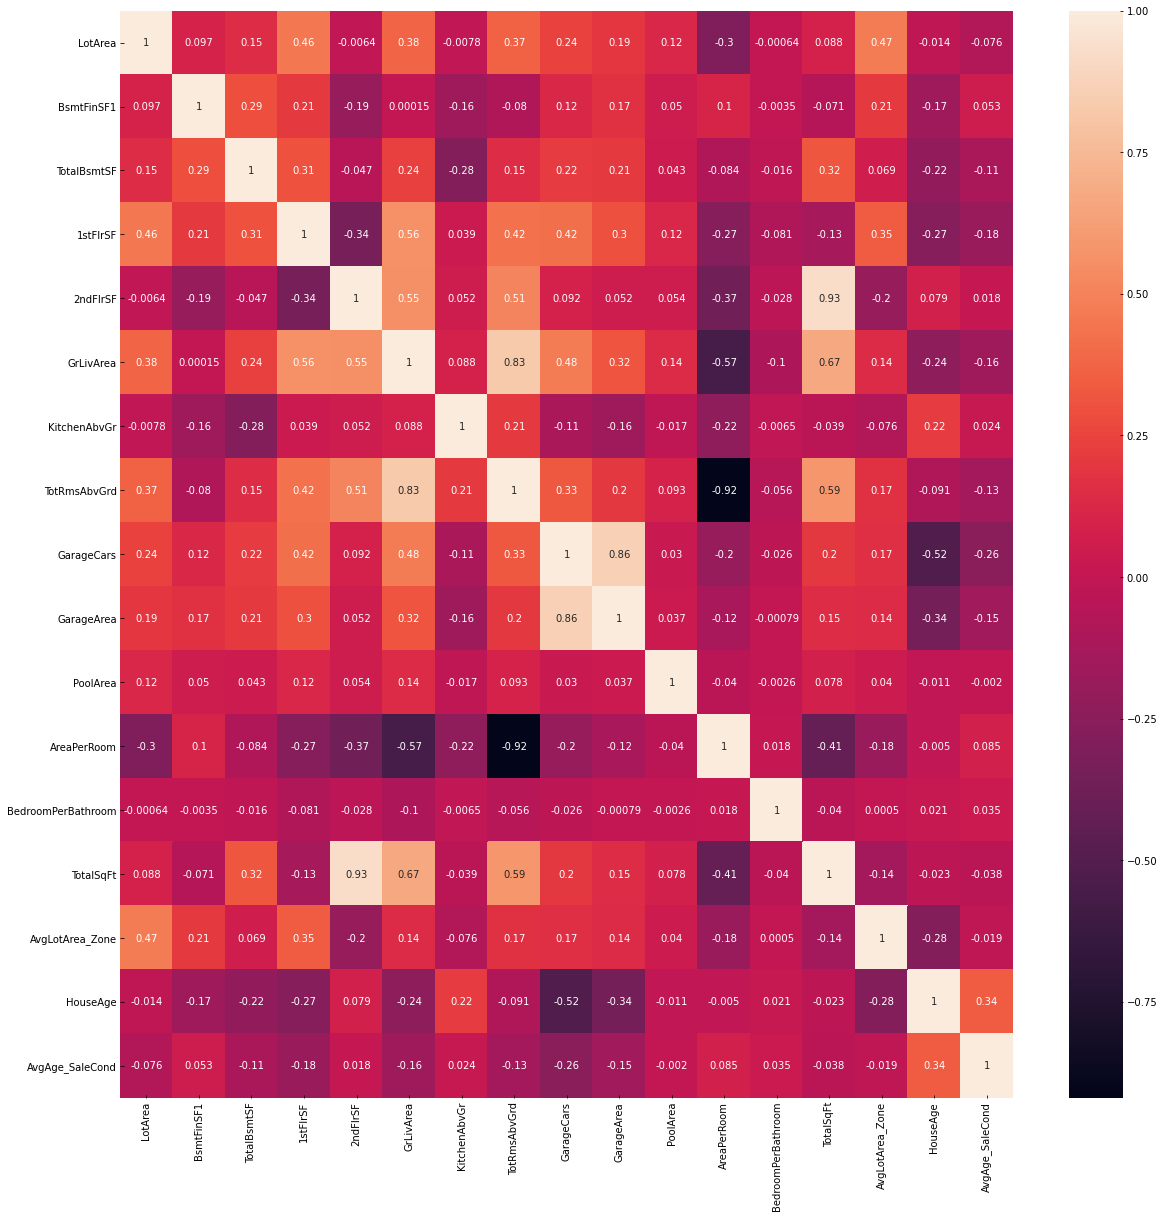

In [93]:
# Plotting heatmap for numerical features
plt.figure(figsize=(20,20))
sns.heatmap(X_train[numericalFeatures].corr(), annot=True)
plt.show()

We can see that few pair of features are having very high correlation, we should drop one from each pair.
From the above heatmap, we will drop the following columns:
1. __2ndFlrSF__ : Having high correlaton with TotalSqFt (0.93), and TotalSqFt is more significant to business understanding.
2. __TotRmsAbvGrd__ : Having high correlation with AreaPerRoom(-0.92) and GrLivArea(0.83).

In [94]:
# Dropping 2ndFlrSF and TotRmsAbvGrd from training set
X_train.drop(['2ndFlrSF','TotRmsAbvGrd'], axis=1, inplace=True)

We can see that, there's not much correlation between individual features other than the ones which were dropped above. So, now we are left with 148 features.

We have now filtered out some features. Now, let's apply regularization to our model to lower the chances of model overfitting.

## Regularization

We will regularize our model using Ridge(L2) and Lasso(L1) regularization.

In [95]:
# Importing necessary libraries

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold

So, for regularization we will use __Hyperparameter tuning using Cross Validation__.<br>
We will use __GridSearchCV() from sklearn___ to achieve this.

### Ridge Regularization

For Ridge we use a regularization term in the cost function of Linear Regression which is given by:

### <mark>Cost Function = RSS+λΣß²</mark>

Here,__λ__  is the hyperparameter which needs to be tuned. So, now we will create a list of __λ__ values to be tuned.

`If value is too high it will lead to underfitting, if it is too low, it will not handle the overfitting.`

In [96]:
# List of alphas to tune
hyperparams = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000, 5000]}

# Defining a Ridge model
ridgeModel = Ridge()

# Defining the KFold object
folds = KFold(n_splits=20, random_state=15)

Now, using the above hyperparameters, Ridge model object and the number of folds 
We will apply the __GridSearchCV__ to tune it.

In [97]:
# Defining the GridSearchCV object
ridgeModel_cv = GridSearchCV(estimator = ridgeModel,
                             param_grid = hyperparams,
                             scoring= 'neg_mean_absolute_error',
                             cv = folds,
                             return_train_score=True,
                             verbose = 1)  

# Fitting GridSearchCV on training data
ridgeModel_cv.fit(X_train, y_train)

Fitting 20 folds for each of 29 candidates, totalling 580 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 580 out of 580 | elapsed:    9.3s finished


GridSearchCV(cv=KFold(n_splits=20, random_state=15, shuffle=False),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000, 5000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Now, let's print the best hyperparameter from the list accoding to GridSearchCV

In [98]:
# Printing the best hyperparameter alpha

print(ridgeModel_cv.best_params_)

{'alpha': 0.2}


So, from this value we can understand that out of the given values of alpha, model is performing best when the alpha is as mentioned above.But, the best value for the hyperparameter alpha might not be exactly the same. For determining this, let's look at the pattern of model performance w.r.t increase in alpha. 

We will create a dataframe to store the cross validation results.

In [99]:
# Storing tuning results to a dataframe
tuningResults = pd.DataFrame(ridgeModel_cv.cv_results_)
tuningResults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,mean_train_score,std_train_score
0,0.021543,0.053493,0.003988,0.001971,0.0001,{'alpha': 0.0001},-0.026603,-0.033500,-0.029083,-0.032612,-0.029624,-0.027196,-0.027404,-0.033893,-0.023374,-0.034519,-0.042145,-0.030341,-0.023613,-0.032273,-0.029776,-0.029776,-0.041469,-0.029562,-0.031569,...,-0.031147,0.004735,13,-0.023623,-0.023433,-0.023684,-0.023421,-0.023944,-0.023489,-0.023366,-0.023716,-0.023637,-0.023300,-0.023479,-0.023390,-0.023628,-0.023507,-0.023271,-0.023569,-0.022539,-0.023433,-0.023367,-0.023155,-0.023448,0.000272
1,0.008674,0.002047,0.003393,0.000969,0.001,{'alpha': 0.001},-0.026676,-0.033484,-0.028902,-0.032634,-0.030543,-0.027052,-0.027503,-0.034325,-0.023473,-0.033984,-0.042160,-0.030510,-0.023605,-0.032216,-0.029696,-0.028920,-0.041557,-0.029602,-0.031592,...,-0.031147,0.004739,14,-0.023625,-0.023444,-0.023683,-0.023433,-0.023955,-0.023494,-0.023372,-0.023715,-0.023648,-0.023326,-0.023486,-0.023407,-0.023635,-0.023510,-0.023282,-0.023605,-0.022547,-0.023445,-0.023372,-0.023156,-0.023457,0.000271
2,0.007884,0.001376,0.003337,0.000786,0.01,{'alpha': 0.01},-0.026533,-0.033398,-0.028558,-0.032560,-0.030919,-0.026812,-0.027618,-0.034155,-0.023579,-0.034282,-0.042067,-0.030210,-0.023418,-0.032108,-0.029691,-0.029384,-0.041419,-0.029412,-0.031477,...,-0.031094,0.004727,12,-0.023656,-0.023488,-0.023739,-0.023472,-0.023955,-0.023553,-0.023429,-0.023750,-0.023686,-0.023362,-0.023529,-0.023439,-0.023681,-0.023556,-0.023351,-0.023649,-0.022601,-0.023486,-0.023412,-0.023204,-0.023500,0.000265
3,0.007879,0.001475,0.003190,0.000811,0.05,{'alpha': 0.05},-0.026137,-0.032999,-0.028048,-0.032275,-0.030866,-0.026586,-0.027892,-0.032246,-0.023662,-0.033765,-0.041569,-0.028997,-0.022831,-0.031848,-0.029937,-0.030673,-0.041640,-0.028621,-0.031302,...,-0.030787,0.004695,10,-0.023850,-0.023656,-0.023897,-0.023641,-0.023986,-0.023715,-0.023619,-0.023864,-0.023834,-0.023516,-0.023724,-0.023622,-0.023871,-0.023729,-0.023500,-0.023821,-0.022817,-0.023642,-0.023560,-0.023350,-0.023661,0.000247
4,0.007930,0.001280,0.003389,0.000914,0.1,{'alpha': 0.1},-0.025948,-0.032553,-0.028138,-0.031942,-0.030793,-0.026539,-0.028053,-0.030657,-0.023689,-0.033375,-0.041013,-0.028113,-0.022453,-0.031574,-0.030147,-0.031556,-0.042214,-0.028165,-0.031447,...,-0.030602,0.004721,4,-0.024111,-0.023953,-0.024137,-0.023900,-0.024085,-0.023990,-0.023876,-0.024112,-0.024075,-0.023754,-0.024005,-0.023944,-0.024171,-0.024011,-0.023762,-0.024130,-0.023095,-0.023909,-0.023825,-0.023626,-0.023924,0.000238
5,0.007528,0.001197,0.003342,0.000573,0.2,{'alpha': 0.2},-0.026031,-0.032627,-0.028722,-0.031337,-0.030629,-0.026786,-0.028163,-0.028779,-0.023668,-0.033004,-0.040683,-0.027389,-0.022235,-0.031242,-0.030346,-0.032228,-0.042773,-0.027861,-0.031641,...,-0.030489,0.004783,1,-0.024496,-0.024399,-0.024485,-0.024289,-0.024289,-0.024413,-0.024284,-0.024487,-0.024498,-0.024119,-0.024369,-0.024429,-0.024610,-0.024422,-0.024209,-0.024573,-0.023517,-0.024339,-0.024266,-0.024058,-0.024327,0.000232
6,0.008031,0.001158,0.003539,0.000738,0.3,{'alpha': 0.3},-0.026236,-0.032731,-0.029002,-0.030872,-0.030452,-0.027083,-0.028220,-0.027

It will be difficult to determine the pattern using this table. Let's visualize it using a line plot.

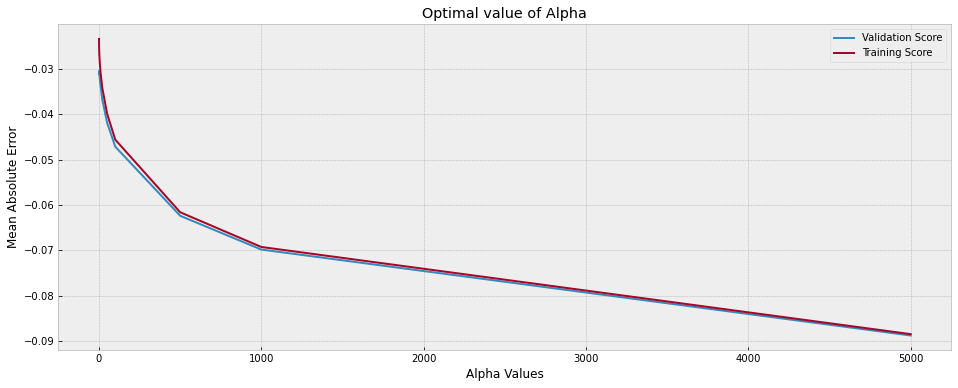

In [100]:
# Visualizing GridSeachCV results

plt.figure(figsize=(16,6))
plt.plot(tuningResults["param_alpha"], tuningResults["mean_test_score"])
plt.plot(tuningResults["param_alpha"], tuningResults["mean_train_score"])
plt.xlabel('Alpha Values')
plt.ylabel('Mean Absolute Error')
plt.title("Optimal value of Alpha")
plt.legend(['Validation Score', 'Training Score'], loc='upper right')
plt.show()

From the above plot, we can see that at low values of alpha our ridge model is performing good. And from our GridSearchCV, we know that alpha is also near 0. Now, let's take the alpha in the range of values near the selected alpha values and see which is the best value.

Using those alpha we will perform the GridSearchCV again.

In [101]:
# List of alphas to tune
hyperparams = {'alpha': list(np.round(np.arange(0,0.4,0.01),2))}

# Defining a Ridge model
ridgeModel = Ridge()

# Defining the KFold object
folds = KFold(n_splits=20, random_state=15)

# Defining the GridSearchCV object
ridgeModel_cv = GridSearchCV(estimator = ridgeModel,
                             param_grid = hyperparams,
                             scoring= 'neg_mean_absolute_error',
                             cv = folds,
                             return_train_score=True,
                             verbose = 1)  

# Fitting GridSearchCV on training data
ridgeModel_cv.fit(X_train, y_train)

Fitting 20 folds for each of 40 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   12.6s finished


GridSearchCV(cv=KFold(n_splits=20, random_state=15, shuffle=False),
             estimator=Ridge(),
             param_grid={'alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13,
                                   0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2,
                                   0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27,
                                   0.28, 0.29, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Now, let's print the best hyperparameter from the list accoding to GridSearchCV

In [102]:
# Printing the best hyperparameter alpha

print(ridgeModel_cv.best_params_)

{'alpha': 0.21}


We will now use this alpha value to train our ridge model and see it's performance on training data.

In [103]:
# Fitting Ridge model for alpha = 0.24
optimumAlphaRidge = ridgeModel_cv.best_params_['alpha']
ridgeModel = Ridge(alpha = optimumAlphaRidge)

ridgeModel.fit(X_train, y_train)

Ridge(alpha=0.21)

Lets calculate some metrics such as __R2 score, RSS and RMSE__ on the training set.

In [104]:
# Predicting target using training set
y_train_pred = ridgeModel.predict(X_train)

# Creating a list to store Ridge model metrics
metricsRidge = []

# Calculating R2 Score
r2_train = r2_score(y_train, y_train_pred)
print("R2 Score: "+ str(r2_train))
metricsRidge.append(r2_train)

# Calculating RSS
rss_train = np.sum(np.square(y_train - y_train_pred))
print("RSS: "+ str(rss_train))
metricsRidge.append(rss_train)

# Calculating MSE
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE: "+ str(mse_train))
metricsRidge.append(mse_train**0.5)

R2 Score: 0.931976460014045
RSS: 1.2087181797419635
MSE: 0.0011908553494994715


With this we have regularized our model using __Ridge regularization (L2)__. Now, let's regularize our model using __Lasso__ and compare both of them on the basis of metrics.

### Lasso Regularization

For Lasso we use a regularization term in the cost function of Linear Regression which is given by:

### <mark>Cost Function = RSS+λΣ|ß|</mark>

Here,__λ__  is the hyperparameter which needs to be tuned. So, now we will create a list of __λ__ values to be tuned.

`If value is too high it will lead to underfitting, if it is too low, it will not handle the overfitting.`

In [105]:
# List of alphas to tune
hyperparams = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000, 5000]}

# Defining a Lasso model
lassoModel = Lasso()

# Defining the KFold object
folds = KFold(n_splits=20, random_state=15)

Now, using the above hyperparameters, Lasso model object and the number of folds 
We will apply the __GridSearchCV__ to tune it.

In [106]:
# Defining the GridSearchCV object
lassoModel_cv = GridSearchCV(estimator = lassoModel,
                             param_grid = hyperparams,
                             scoring= 'neg_mean_absolute_error',
                             cv = folds,
                             return_train_score=True,
                             verbose = 1)  

# Fitting GridSearchCV on training data
lassoModel_cv.fit(X_train, y_train)

Fitting 20 folds for each of 29 candidates, totalling 580 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 580 out of 580 | elapsed:    9.8s finished


GridSearchCV(cv=KFold(n_splits=20, random_state=15, shuffle=False),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000, 5000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Now, let's print the best hyperparameter from the list accoding to GridSearchCV

In [107]:
# Printing the best hyperparameter alpha

print(lassoModel_cv.best_params_)

{'alpha': 0.0001}


So, from this value we can understand that out of the given values of alpha, model is performing best when this value of alpha from the list of params given.But, the best value for the hyperparameter alpha might not be exactly the same, it will be near to this. For determining this, let's look at the pattern of model performance w.r.t increase in alpha. 

We will create a dataframe to store the cross validation results.

In [108]:
# Storing tuning results to a dataframe
tuningResults = pd.DataFrame(lassoModel_cv.cv_results_)
tuningResults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,mean_train_score,std_train_score
0,0.033226,0.027090,0.003687,0.000775,0.0001,{'alpha': 0.0001},-0.026621,-0.033133,-0.030226,-0.030837,-0.031070,-0.028170,-0.028384,-0.024383,-0.022485,-0.033930,-0.036328,-0.028090,-0.020400,-0.030882,-0.031005,-0.032177,-0.042275,-0.025394,-0.031326,...,-0.030047,0.004812,1,-0.026588,-0.026272,-0.026620,-0.026508,-0.025942,-0.026546,-0.026444,-0.026572,-0.026757,-0.026308,-0.026471,-0.026577,-0.026935,-0.026504,-0.026431,-0.026719,-0.025698,-0.026662,-0.026401,-0.026390,-0.026467,0.000266
1,0.012772,0.002030,0.003491,0.000802,0.001,{'alpha': 0.001},-0.032159,-0.040389,-0.033457,-0.041770,-0.035951,-0.033706,-0.035809,-0.034976,-0.024771,-0.041601,-0.041569,-0.036150,-0.028608,-0.034991,-0.033059,-0.032802,-0.042599,-0.029739,-0.035528,...,-0.035198,0.004561,2,-0.033786,-0.033549,-0.033821,-0.033427,-0.033290,-0.033753,-0.033690,-0.033772,-0.033978,-0.033697,-0.033116,-0.033878,-0.034055,-0.033647,-0.033571,-0.033534,-0.033410,-0.034034,-0.033530,-0.033584,-0.033656,0.000237
2,0.009371,0.001355,0.003542,0.000972,0.01,{'alpha': 0.01},-0.061993,-0.069054,-0.076272,-0.073886,-0.066265,-0.081803,-0.080270,-0.072806,-0.058469,-0.073470,-0.076331,-0.075656,-0.067474,-0.084868,-0.086625,-0.071205,-0.074992,-0.060736,-0.069256,...,-0.072005,0.007961,3,-0.071316,-0.070747,-0.071117,-0.070629,-0.070820,-0.071574,-0.071219,-0.071324,-0.071625,-0.071259,-0.071101,-0.070976,-0.071027,-0.070638,-0.070839,-0.071118,-0.070883,-0.071230,-0.070905,-0.071165,-0.071076,0.000270
3,0.008255,0.001352,0.003040,0.000864,0.05,{'alpha': 0.05},-0.097216,-0.085966,-0.110740,-0.113757,-0.091390,-0.112156,-0.110222,-0.100863,-0.088224,-0.100327,-0.111195,-0.099500,-0.097912,-0.108649,-0.124752,-0.101407,-0.107510,-0.086632,-0.103011,...,-0.101975,0.010254,4,-0.102014,-0.102638,-0.101390,-0.101131,-0.102236,-0.101187,-0.101298,-0.101837,-0.102542,-0.101984,-0.101350,-0.101931,-0.101935,-0.101351,-0.100632,-0.101759,-0.101559,-0.102573,-0.101776,-0.102472,-0.101780,0.000533
4,0.008376,0.001389,0.003290,0.000841,0.1,{'alpha': 0.1},-0.097216,-0.085966,-0.110740,-0.113757,-0.091390,-0.112156,-0.110222,-0.100863,-0.088224,-0.100327,-0.111195,-0.099500,-0.097912,-0.108649,-0.124752,-0.101407,-0.107510,-0.086632,-0.103011,...,-0.101975,0.010254,4,-0.102014,-0.102638,-0.101390,-0.101131,-0.102236,-0.101187,-0.101298,-0.101837,-0.102542,-0.101984,-0.101350,-0.101931,-0.101935,-0.101351,-0.100632,-0.101759,-0.101559,-0.102573,-0.101776,-0.102472,-0.101780,0.000533
5,0.007983,0.001225,0.003139,0.000794,0.2,{'alpha': 0.2},-0.097216,-0.085966,-0.110740,-0.113757,-0.091390,-0.112156,-0.110222,-0.100863,-0.088224,-0.100327,-0.111195,-0.099500,-0.097912,-0.108649,-0.124752,-0.101407,-0.107510,-0.086632,-0.103011,...,-0.101975,0.010254,4,-0.102014,-0.102638,-0.101390,-0.101131,-0.102236,-0.101187,-0.101298,-0.101837,-0.102542,-0.101984,-0.101350,-0.101931,-0.101935,-0.101351,-0.100632,-0.101759,-0.101559,-0.102573,-0.101776,-0.102472,-0.101780,0.000533
6,0.007630,0.001236,0.003437,0.000668,0.3,{'alpha': 0.3},-0.097216,-0.085966,-0.110740,-0.113757,-0.091390,-0.112156,-0.110222,-0.100863,

It will be difficult to determine the pattern using this table. Let's visualize it using a line plot.

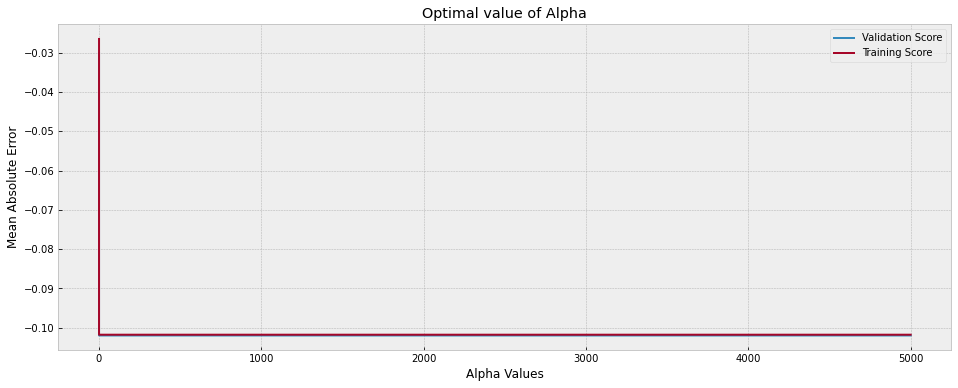

In [109]:
# Visualizing GridSeachCV results

plt.figure(figsize=(16,6))
plt.plot(tuningResults["param_alpha"], tuningResults["mean_test_score"])
plt.plot(tuningResults["param_alpha"], tuningResults["mean_train_score"])
plt.xlabel('Alpha Values')
plt.ylabel('Mean Absolute Error')
plt.title("Optimal value of Alpha")
plt.legend(['Validation Score', 'Training Score'], loc='upper right')
plt.show()

From the above plot, we can see that at extremely low values of alpha our lasso model is performing well and beyond 0 it is performing very poor. And from our GridSearchCV, we know that alpha=0.0001 is the best one. Now, let's take the alpha in the range of __0 - 0.0004__ and see which is the best value.

Using those alpha we will perform the GridSearchCV again.

In [110]:
# List of alphas to tune
hyperparams = {'alpha': list(np.round(np.arange(0,0.0004,0.00001),5))}

# Defining a Ridge model
lassoModel = Lasso()

# Defining the KFold object
folds = KFold(n_splits=20, random_state=15)

# Defining the GridSearchCV object
lassoModel_cv = GridSearchCV(estimator = lassoModel,
                             param_grid = hyperparams,
                             scoring= 'neg_mean_absolute_error',
                             cv = folds,
                             return_train_score=True,
                             verbose = 1)  

# Fitting GridSearchCV on training data
lassoModel_cv.fit(X_train, y_train)

Fitting 20 folds for each of 40 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   29.5s finished


GridSearchCV(cv=KFold(n_splits=20, random_state=15, shuffle=False),
             estimator=Lasso(),
             param_grid={'alpha': [0.0, 1e-05, 2e-05, 3e-05, 4e-05, 5e-05,
                                   6e-05, 7e-05, 8e-05, 9e-05, 0.0001, 0.00011,
                                   0.00012, 0.00013, 0.00014, 0.00015, 0.00016,
                                   0.00017, 0.00018, 0.00019, 0.0002, 0.00021,
                                   0.00022, 0.00023, 0.00024, 0.00025, 0.00026,
                                   0.00027, 0.00028, 0.00029, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Now, let's print the best hyperparameter from the list accoding to GridSearchCV

In [111]:
# Printing the best hyperparameter alpha

print(lassoModel_cv.best_params_)

{'alpha': 0.00013}


We will now use this alpha value to train our lasso model and see it's performance on training data.

In [112]:
# Fitting Lasso model for alpha = 6e-05
optimumAlphaLasso = lassoModel_cv.best_params_['alpha']
lassoModel = Lasso(alpha = optimumAlphaLasso)

lassoModel.fit(X_train, y_train)

Lasso(alpha=0.00013)

Lets calculate some metrics such as __R2 score, RSS and RMSE__ on the training set.

In [113]:
# Predicting target using training set
y_train_pred = lassoModel.predict(X_train)

# Creating a list to store Lasso model metrics
metricsLasso = []

# Calculating R2 Score
r2_train = r2_score(y_train, y_train_pred)
print("R2 Score: "+ str(r2_train))
metricsLasso.append(r2_train)

# Calculating RSS
rss_train = np.sum(np.square(y_train - y_train_pred))
print("RSS: "+ str(rss_train))
metricsLasso.append(rss_train)

# Calculating MSE
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE: "+ str(mse_train))
metricsLasso.append(mse_train**0.5)

R2 Score: 0.9090800881153751
RSS: 1.6155664703450314
MSE: 0.0015916911037882084


Now, we have regularized our model using Ridge and then Lasso. Now, let's compare their metrics.

In [114]:
# Creating a table which contain all the metrics for Ridge and Lasso

pd.DataFrame({'Metric': ['R2 Score' ,'RSS','MSE'],
              'Ridge': metricsRidge,
              'Lasso': metricsLasso})

,Metric,Ridge,Lasso
0,R2 Score,0.931976,0.909080
1,RSS,1.208718,1.615566
2,MSE,0.034509,0.039896


We can see both models are having a good performance even after regularization. Though, we can see that model regularized using __Ridge__ regularization is having slightly better performance than the one regularized using __Lasso__ regularization.

Now, let's compare the number of features in both models.

In [115]:
# Printing the number of features the model regularized using Ridge and Lasso

print("Number of Features")
print("Ridge : ",len(ridgeModel.coef_))
print("Lasso : ",sum(lassoModel.coef_!=0))

Number of Features
Ridge :  148
Lasso :  72


<mark>From the above cell output, we can say that we have __around half of the features__ in case of the model regularized using __Lasso Regularization__. Lasso Model has very less features and it is able to explain __almost 91%__ of the variance in the data. Whereas Ridge model has __148 features__ and it is able to explain __almost 93%__ of the variance in the data, which is not much significantly larger than that of Lasso.</mark>

__We can conclude from the above observation that model regularized using Lasso is the better one as it is very much simpler than that of Ridge. Hence, we will use _lassoModel_ as the final model.__

In [116]:
# Saving lassoModel as final model

housePriceFinalModel = lassoModel

Now, we have finalized our model. We will now perform the Residual Analysis.

# 6. RESIDUAL ANALYSIS

We will check if the residual assumptions made for a Linear Regression are valid for our final model. We'll check the following:

- Error terms are normally distributed with mean=0.
- Error terms are having constant variance i.e. error terms are __homescedastic__ in nature.
- Error terms have no relationship among them.

Let's find the residual.<br>
We know,

<mark>__Residual = Actual - Predicted__</mark>

So, we will use this formula to find out the residual terms.

In [117]:
# Predicting using training set
y_train_pred = housePriceFinalModel.predict(X_train)

# Determining residuals from the model built
residuals = y_train - y_train_pred

Now, we have calculated the residuals. To check whether the Error terms are normally distributed with mean 0, we will plot distribution plot for residuals.

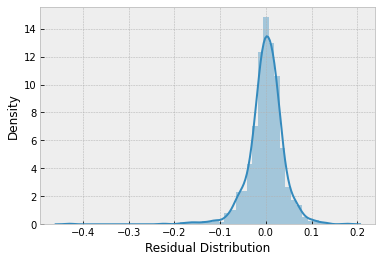

In [118]:
# Plotting distribution plot using seaborn

sns.distplot(x=residuals)
plt.xlabel("Residual Distribution")
plt.show()

From the above plot we can infer the following : 
1. <mark>Error terms are normally distributed.</mark>
2. <mark>Error terms have mean = 0</mark>

So, residuals are following the assumption of normal distribution. Now, let's check __homoscedasticity__ and the relationship using scatter plot.

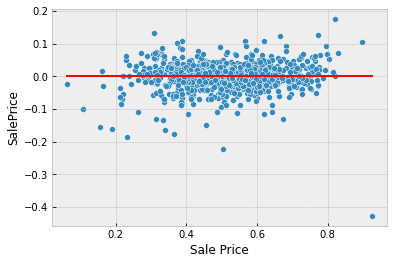

In [119]:
# Plotting scatterplot between residuals and the predictions i.e. y_train_pred

sns.scatterplot(x=y_train_pred, y=residuals)
plt.plot(y_train_pred, 0*y_train_pred,'r')
plt.xlabel('Sale Price')
plt.show()

Here, we can see that __error terms are uniformly distributed along y=0__. This tells us the following:
1. <mark>Error terms (residuals) have constant variance i.e. error terms are __homoscedastic__ in nature.</mark>
2. <mark>Error terms have no relationship with the sale price i.e. error terms are __independent__ in nature.</mark>

__We have now validated all the residual assumptions for our Linear Regression model.__<br>We will now proceed with model evaluation.

# 7. MODEL EVALUATION

Here, we will evaluate our final model's performance with __unseen data__, i.e. Test Set.

We have 30% of records from the original dataset (i.e. __housingDataset__) in our test set, as we used 70% of the data to train our Linear Regression model.
Moreover, we scaled our training dataset using MinMaxScaler, hence we'll first transform our test dataset using the MinMaxScaler.

In [120]:
# Transforming Test dataset using the fitted MinMaxScaler object
housing_test[numericalCols] = scaler.transform(housing_test[numericalCols])

In [121]:
# Validating the transformation on test set

housing_test.sample(5)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
738,0.383633,0.414299,0.000000,0.820847,0.0,0.000000,0.813379,0.483684,0.000000,0.0,0.452111,1.26186,0.0,1.000000,0.00000,0.63093,0.5,0.430677,0.0,0.000000,0.000000,0.710003,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
128,0.435403,0.345264,0.790766,0.722377,0.0,0.645119,0.744881,0.257463,0.856141,0.0,0.493261,0.00000,0.0,0.500000,0.63093,0.63093,0.5,0.526456,0.5,0.682606,0.842979,0.776026,0.743917,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
428,0.407525,0.322655,0.663969,0.752419,0.0,0.812310,0.814140,0.486199,0.000000,0.0,0.454462,0.63093,0.0,0.792481,0.00000,0.50000,0.5,0.526456,0.0,0.682606,0.887902,0.690409,0.635452,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
755,0.174659,0.178062,0.961958,0.688245,0.0,0.754848,0.756270,0.301764,0.863714,0.0,0.524159,0.00000,0.0,0.792481,0.63093,0.63093,0.5,0.526456,0.0,0.682606,0.838976,0.000000,0.510424,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1247,0.435403,0.440199,0.823299,0.728315,0.0,0.794316,0.793851,0.427332,0.000000,0.0,0.399437,0.63093,0.0,0.500000,0.00000,0.63093,0.5,0.526456,0.0,0.861353,0.935571,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


Now, we will seperate the target and predictor columns.

In [122]:
# Seperating target and predictor columns

X_test = housing_test.loc[:,housing_test.columns!='SalePrice']
y_test = housing_test['SalePrice']

We'll now keep only those feaures in the test predictors (X_test) which are significant for target prediction.

For this we'll use only those featurs (or columns) which are present in training predictors (X_train).

In [123]:
# Keeping only significant predictors in X_test

X_test = X_test.loc[:, X_train.columns]

Now, we have the required test data. Let's predict the Sale Price of houses using our final model.

In [124]:
# Predicting using unseen data
y_test_pred = housePriceFinalModel.predict(X_test)

We have now calculated the __Sale Price of houses__ based on the unseen predictors.

Let's now evaluate the model using `R_Squared`.

In [125]:
# Evaluating the model against unseen data
r2 = r2_score(y_test, y_test_pred)
r2

0.8933592257861654

### Final Model's r2_score ≈  `0.89`

In [126]:
# Printing in percentage format

print(round(r2*100,2),'%')

89.34 %


### Model Accuracy : `89%`

We can see that our model performed very well even with unseen data, which tells us that we have created a very good model for predicting the sale price of houses.

Now, let's plot a scatter plot to visualize the spread between actual and predicted.

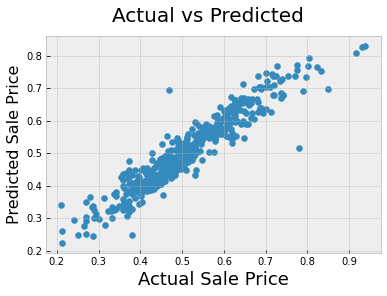

In [127]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Predicted', fontsize = 20)          # Plot heading 
plt.xlabel('Actual Sale Price', fontsize = 18)              # X-label
plt.ylabel('Predicted Sale Price', fontsize = 16)   
plt.show()

As we can see from the above plot that there's <mark>__very strong linear relationship between the Actual and Predicted sale prices.__</mark>  With this we can conclude that our model is decent enough for prediction of __the sale price of houses.__

Now, let's determine the most important predictors for predicting the Sale price of a house. For this we will sort the predictors with the magnitude of their model coefficients.

In [128]:
# making a list of predictors which have coefficient not equal to 0
predictors = X_test.columns[housePriceFinalModel.coef_!=0]

# Making a list of model coefficients
coefficients = housePriceFinalModel.coef_[housePriceFinalModel.coef_!=0]

# Making a list of absolute value of coefficients to determine the most important predictors
coeffAbsolute = [abs(coeff) for coeff in coefficients]

# Setting max rows to 100
pd.set_option('display.max_rows', 100)

# Creating a dataframe to display the above values and sorting by absolute value of coefficients
(pd.DataFrame({'Predictors': predictors,
             'Model Coefficient': coefficients,
             'Coefficient Absolute':coeffAbsolute})
 .sort_values('Coefficient Absolute',ascending=False).reset_index(drop=True))

,Predictors,Model Coefficient,Coefficient Absolute
0,GrLivArea,0.382055,0.382055
1,Condition2_PosN,-0.228679,0.228679
2,OverallQual_9,0.108374,0.108374
3,MSZoning_RL,0.101118,0.101118
4,LotArea,0.095192,0.095192
5,HouseAge,-0.086133,0.086133
6,AvgLotArea_Zone,-0.081418,0.081418
7,GarageCars,0.077672,0.077672
8,1stFlrSF,0.075814,0.075814
9,OverallQual_8,0.075271,0.075271


# Conclusion

We can see the most important predictors for Sale Price of houses from the above cell output. Following are top 10 predictors:
1. <mark>__GrLivArea__: Above ground living area.</mark> <span style="color:green">(POSITIVE)</span>
2. <mark>__Condition2_PosN__: Proximity to various places such as off-site feature-park, greenbelt, etc.</mark> <span style="color:red">(NEGATIVE)</span>
3. <mark>__OverallQual_9__:	Overall Material and finish of the house is Excellent.</mark> <span style="color:green">(POSITIVE)</span>
4. <mark>__MSZoning_RL__: General zoning classification of the sale as Low Density Residential Zone.</mark> <span style="color:green">(POSITIVE)</span>
5. <mark>__LotArea__: Total Lot Size of the house</mark> <span style="color:green">(POSITIVE)</span>
6. <mark>__HouseAge__: Age of the house</mark> <span style="color:red">(NEGATIVE)</span>
7. <mark>__AgeLotArea_Zone__: Average Lot Area by Zone</mark> <span style="color:red">(NEGATIVE)</span>
8. <mark>__GarageCars__ : Size of garage in car capacity.</mark> <span style="color:green">(POSITIVE)</span>
9. <mark>__1stFlrSF__ : 1st Floor area</mark> <span style="color:green">(POSITIVE)</span>
10. <mark>__OverallQual_8__ : Overall Material and finish of the house is Very Good.</mark> <span style="color:green">(POSITIVE)</span>

# <center>House Price Prediction - Part 2</center>

## Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

__ANSWER__:
For this we will double the value of alpha for both Ridge and Lasso and rebuild the model and look at the changes.

In [129]:
# Copying Ridge and Lasso models and the optimal alphas

ridgeCopy = ridgeModel
lassoCopy = lassoModel

alphaRidge = ridgeModel_cv.best_params_['alpha']
alphaLasso = lassoModel_cv.best_params_['alpha']

In [130]:
# Creating a function for listing the top 5 features

def top_features(ridgeReg, lassoReg):
    # making a list of predictors
    predictors = X_test.columns

    # Making a list of model coefficients
    coeffRidge = ridgeReg.coef_
    coeffLasso = lassoReg.coef_

    # Making a list of absolute value of coefficients to determine the most important predictors
    coeffAbsRidge = [abs(coeff) for coeff in coeffRidge]
    coeffAbsLasso = [abs(coeff) for coeff in coeffLasso]


    # Creating a dataframe to display the top 5 predictors in both regularization
    print("Ridge Regularization")
    print(pd.DataFrame({'Predictors': predictors,
                 'Model Coefficient': coeffRidge,
                 'Coefficient Absolute':coeffAbsRidge})
     .sort_values('Coefficient Absolute',ascending=False).reset_index(drop=True).head())
    
    print("----------------------------------------------------------------")
    print("Lasso Regularization")
    print(pd.DataFrame({'Predictors': predictors,
                 'Model Coefficient': coeffLasso,
                 'Coefficient Absolute':coeffAbsLasso})
     .sort_values('Coefficient Absolute',ascending=False).reset_index(drop=True).head())

In [131]:
# Listing top features before doubling the alphas
top_features(ridgeCopy, lassoCopy)

Ridge Regularization
         Predictors  Model Coefficient  Coefficient Absolute
0         GrLivArea           0.320129              0.320129
1   Condition2_PosN          -0.298985              0.298985
2  RoofMatl_WdShngl           0.283545              0.283545
3  RoofMatl_CompShg           0.258063              0.258063
4  RoofMatl_Tar&Grv           0.254036              0.254036
----------------------------------------------------------------
Lasso Regularization
        Predictors  Model Coefficient  Coefficient Absolute
0        GrLivArea           0.382055              0.382055
1  Condition2_PosN          -0.228679              0.228679
2    OverallQual_9           0.108374              0.108374
3      MSZoning_RL           0.101118              0.101118
4          LotArea           0.095192              0.095192


In [132]:
# Printing the number of features the model regularized using Ridge and Lasso

print("Number of Features")
print("Ridge : ",len(ridgeCopy.coef_))
print("Lasso : ",sum(lassoCopy.coef_!=0))

Number of Features
Ridge :  148
Lasso :  72


In [133]:
# Fitting Ridge and Lasso for double optimum alpha

ridgeDoubleAlpha = Ridge(alpha = alphaRidge*2).fit(X_train, y_train)
lassoDoubleAlpha = Lasso(alpha = alphaLasso*2).fit(X_train, y_train)

In [134]:
# Listing top features after doubling the alphas
top_features(ridgeDoubleAlpha, lassoDoubleAlpha)

Ridge Regularization
         Predictors  Model Coefficient  Coefficient Absolute
0         GrLivArea           0.283312              0.283312
1   Condition2_PosN          -0.248157              0.248157
2  RoofMatl_WdShngl           0.191779              0.191779
3  RoofMatl_CompShg           0.165782              0.165782
4  RoofMatl_Tar&Grv           0.157935              0.157935
----------------------------------------------------------------
Lasso Regularization
      Predictors  Model Coefficient  Coefficient Absolute
0      GrLivArea           0.380959              0.380959
1  OverallQual_9           0.094434              0.094434
2     GarageCars           0.080812              0.080812
3       HouseAge          -0.080443              0.080443
4        LotArea           0.073377              0.073377


In [135]:
# Printing the number of features the model regularized using Ridge and Lasso

print("Number of Features")
print("Ridge : ",len(ridgeDoubleAlpha.coef_))
print("Lasso : ",sum(lassoDoubleAlpha.coef_!=0))

Number of Features
Ridge :  148
Lasso :  58


## Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

__ANSWER__: <br>
Optimal value of lambda for Ridge and Lasso is 0.21 and 0.00013 respectively. I’ll choose Lasso over Ridge as the final model for predicting the house prices.
 
__Ridge:__ 148 features, R2 Score: 0.93
__Lasso:__ 72 features, R2 Score: 0.91

In Ridge, we have 148 features with an R-Squared value around 0.93 whereas Lasso has around half of the features in comparison to Ridge model with an R-Squared value around 0.91. This indicates that nearly half of the features in the model regularized using Ridge are not much significant predictors for the Sale Price of the house. These extra features are increasing the model complexity though not adding much to the predictive power. Hence, model regularized using Lasso is a better model as it has half of the number of features and having a decent predictive power. Also, the business would prefer to have a model built with lesser number of features and having decent predictive power which we can see for Lasso model.

## Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

__ANSWER__:
For this, we will first print out the top 5 features from Lasso Model.

In [136]:
# Printing top 5 features

# making a list of predictors
predictors = X_test.columns

# Making a list of model coefficients
coeffLasso = lassoCopy.coef_

# Making a list of absolute value of coefficients to determine the most important predictors
coeffAbsLasso = [abs(coeff) for coeff in coeffLasso]

top5Lasso = (pd.DataFrame({'Predictors': predictors,
             'Model Coefficient': coeffLasso,
             'Coefficient Absolute':coeffAbsLasso})
 .sort_values('Coefficient Absolute',ascending=False).reset_index(drop=True).head())

top5Lasso

,Predictors,Model Coefficient,Coefficient Absolute
0,GrLivArea,0.382055,0.382055
1,Condition2_PosN,-0.228679,0.228679
2,OverallQual_9,0.108374,0.108374
3,MSZoning_RL,0.101118,0.101118
4,LotArea,0.095192,0.095192


Now, let's drop the top 5 features and rebuild the model.

In [137]:
# Copying X_train
X_trainCopy = X_train.copy()

# Dropping the top 5 features
X_trainCopy.drop(top5Lasso['Predictors'],axis=1,inplace=True)

Rebuilding lasso model using the remaining features.

In [138]:
lassoNew = Lasso(alpha = alphaLasso).fit(X_trainCopy, y_train)

In [139]:
# Printing top 5 features

# making a list of predictors
predictors = X_trainCopy.columns

# Making a list of model coefficients
coeffLasso = lassoNew.coef_

# Making a list of absolute value of coefficients to determine the most important predictors
coeffAbsLasso = [abs(coeff) for coeff in coeffLasso]

top5LassoNew = (pd.DataFrame({'Predictors': predictors,
             'Model Coefficient': coeffLasso,
             'Coefficient Absolute':coeffAbsLasso})
 .sort_values('Coefficient Absolute',ascending=False).reset_index(drop=True).head())

top5LassoNew

,Predictors,Model Coefficient,Coefficient Absolute
0,1stFlrSF,0.351123,0.351123
1,TotalSqFt,0.189532,0.189532
2,GarageCars,0.103519,0.103519
3,OverallQual_3,-0.103119,0.103119
4,BsmtCond_Po,-0.088729,0.088729


## Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

__ANSWER__: <br>
A model is considered as robust and generalizable when the model is having less variance i.e., on changing the training data the model coefficients should not change a lot. In other words, model should not overfit the training data. To make sure the model is robust and generalisable we try to reduce the chances of model overfit by applying regularization on it. Regularization can be done using following methods:
1.	Lasso Regularization (L1)
2.	Ridge Regularization (L2)

By regularization I mean, we can add a penalty term to the cost function such that the model cost function is penalized for high values of coefficient. The model built using this penalty term or the regularization term has feature coefficients close to zero and is less complex and hence the chances of overfitting is also reduced. 
Though, a regularized model is less prone to overfit but it has lesser accuracy than the original model. This is because after regularization the resultant model is much simpler than the original one and smoother. So, a model with high degree polynomials will become a model with lower degree polynomial. This results in the increased distance of prediction line from the actual data points which is why the regularized model which is robust and generalizable has lesser accuracy. Also, as we know from Bias-Variance Trade-Off that when the variance of the model decreases the bias increases. Similarly, in the case of regularized model the variance is reduced and hence the bias is increased. For test accuracy (accuracy on unseen data), for a regularized model the train and test accuracy will remain close to each other whereas for a non-regularized model the model could overfit and have comparatively less accuracy on unseen data.